In [1]:
!pip install gymnasium

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 953.9/953.9 kB 5.5 MB/s eta 0:00:00


In [2]:
!pip install ipycanvas

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 255.7/255.7 kB 2.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.6/1.6 MB 17.3 MB/s eta 0:00:00


In [3]:
!pip install opencv-python

In [4]:
import gymnasium as gym
from gymnasium import spaces
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
from PIL import Image
from ipycanvas import Canvas
import ipywidgets as widgets
from IPython.display import display, HTML
import matplotlib.pyplot as plt
from matplotlib.offsetbox import OffsetImage, AnnotationBbox
from PIL import Image
import numpy as np
import cv2

In [5]:
class LawnmowerGridWorld:
    def __init__(self, max_steps=6):
        self.grid_size = 4
        self.state_space = spaces.Discrete(self.grid_size * self.grid_size)
        self.action_space = spaces.Discrete(4)
        self.state = (0, 0)
        self.goal_state = (3, 3)
        self.pit_state = (1, 1)
        self.reward_map = {
            (0, 0): 0, (0, 1): +2, (0, 2): +1, (0, 3): -2,
            (1, 0): 0, (1, 1): 0, (1, 2): 0, (1, 3): 0,
            (2, 0): 0, (2, 1): 0, (2, 2): +2, (2, 3): 0,
            (3, 0): -1, (3, 1): 0, (3, 2): +1, (3, 3): 0
        }

        self.max_steps = max_steps
        self.current_step = 0
        self.total_reward = 0
        self.grid_widgets = None

    def reset(self):
        self.state = (0, 0)
        self.current_step = 0
        self.total_reward = 0
        return np.array(self.state)
    def step(self, action):
        if self.current_step >= self.max_steps:
            print("Maximum steps reached. Resetting environment.")
            return np.array(self.state), self.total_reward, True, {}

        x, y = self.state
        if action == 0 and y < self.grid_size - 1:  # Up
            y += 1
        elif action == 1 and y > 0:  # Down
            y -= 1
        elif action == 2 and x < self.grid_size - 1:  # Right
            x += 1
        elif action == 3 and x > 0:  # Left
            x -= 1
        self.state = (x, y)

        reward = self.reward_map.get(self.state, 0)
        if self.state == self.pit_state:
            print("Agent fell in pit")
            reward = -10

        if self.state == self.goal_state:
            # print("Goal is reached")
            reward = 10
            self.current_step = self.max_steps

        self.total_reward = reward
        self.current_step += 1

        return np.array(self.state), self.total_reward, self.current_step >= self.max_steps, {}


    def render(self, mode='human', plot=False):
        fig, ax = plt.subplots(figsize=(4, 4))
        ax.set_xlim(0, self.grid_size)
        ax.set_ylim(0, self.grid_size)
        ax.set_facecolor('green')

        def plot_image(position, image_path):
            x, y = position

            image = Image.open(image_path)
            image = image.resize((100, 100))
            image_box = AnnotationBbox(OffsetImage(image, zoom=0.28), np.add(position, [0.5, 0.5]), frameon=False)
            ax.add_artist(image_box)

        agent_image = 'agent.png'
        goal_image = 'goal.png'
        pit_image = 'pit.png'
        battery_image = 'battery.png'
        rock_image = 'rock.png'

        fallen_in_pit_image = 'agent_fell_pit.png'
        collected_battery_image = 'agent_battery.png'
        hit_rock_image = 'agent_hit_rock.png'
        reached_flag_image = 'agent_flag.png'

        for i in range(self.grid_size):
            for j in range(self.grid_size):
                position = (i, j)
                if position == self.goal_state:
                    plot_image(position, goal_image)
                elif position == self.pit_state:
                    plot_image(position, pit_image)
                elif position in self.reward_map and self.reward_map[position] > 0:
                    plot_image(position, battery_image)
                elif position in self.reward_map and self.reward_map[position] < 0:
                    plot_image(position, rock_image)


        if self.state == self.pit_state:
            plot_image(self.state, fallen_in_pit_image)
        elif self.state in self.reward_map and self.reward_map[self.state] > 0:
            plot_image(self.state, collected_battery_image)
        elif self.state in self.reward_map and self.reward_map[self.state] < 0:
            plot_image(self.state, hit_rock_image)
        elif self.state == self.goal_state:
            plot_image(self.state, reached_flag_image)
        else:
            plot_image(self.state, agent_image)

        plt.xticks(range(self.grid_size))
        plt.yticks(range(self.grid_size)[::-1])
        plt.grid()

        if plot:
            plt.show()
        else:
            fig.canvas.draw()
            img = np.array(fig.canvas.renderer.buffer_rgba())[:, :, :3]
            width = 84
            height = 84
            dim = (width, height)
            preprocessed_image = cv2.resize(img, dim, interpolation=cv2.INTER_AREA)
            plt.show()
            return preprocessed_image

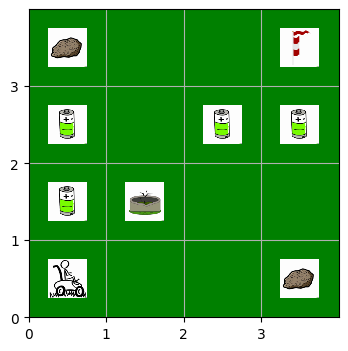

array([[[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       ...,

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]],

       [[255, 255, 255],
        [255, 255, 255],
        [255, 255, 255],
        ...,
        [255, 255, 255],
        [255, 255, 255],
        [255, 255, 255]]

In [6]:
env = LawnmowerGridWorld()

env.render()


**BONUS : Grid world scenario visualization**

Initial Position:
----------------


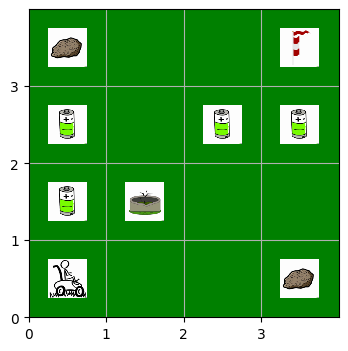

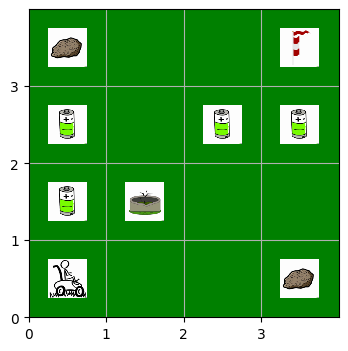

Action Taken: Left, Reached State: [0 0], Reward: 0
-----------------------------------------------------------------------------


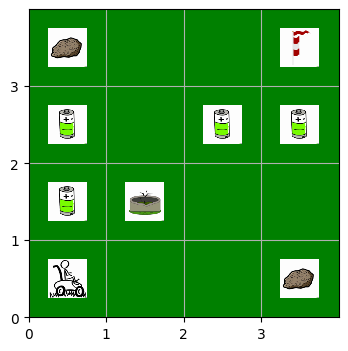

Action Taken: Left, Reached State: [0 0], Reward: 0
-----------------------------------------------------------------------------


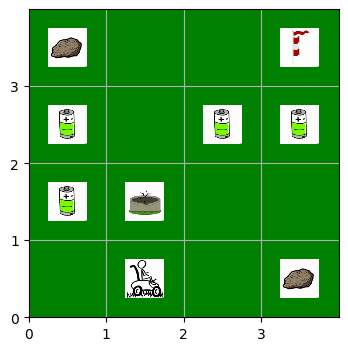

Action Taken: Right, Reached State: [1 0], Reward: 0
-----------------------------------------------------------------------------


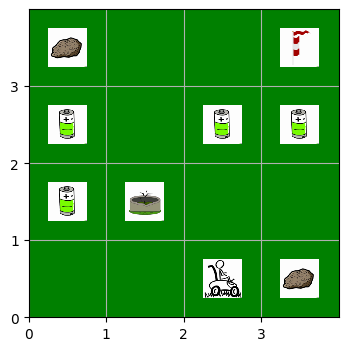

Action Taken: Right, Reached State: [2 0], Reward: 0
-----------------------------------------------------------------------------


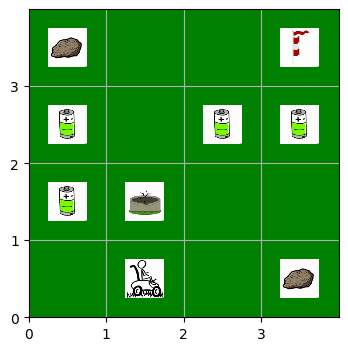

Action Taken: Left, Reached State: [1 0], Reward: 0
-----------------------------------------------------------------------------


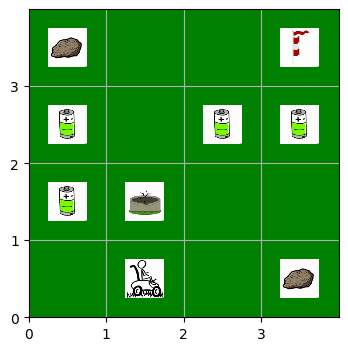

Action Taken: Down, Reached State: [1 0], Reward: 0
-----------------------------------------------------------------------------
Maximum Steps reached


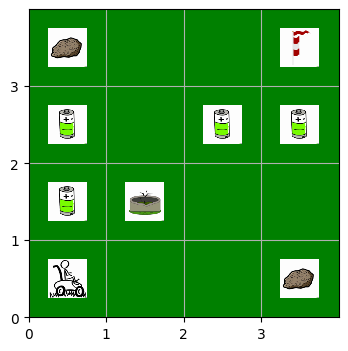

Action Taken: Left, Reached State: [0 0], Reward: 0
-----------------------------------------------------------------------------


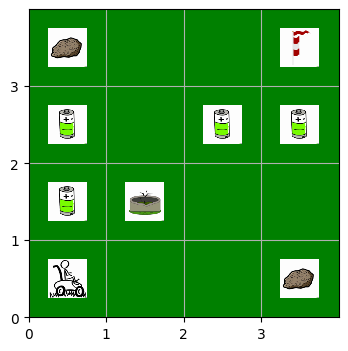

Action Taken: Left, Reached State: [0 0], Reward: 0
-----------------------------------------------------------------------------


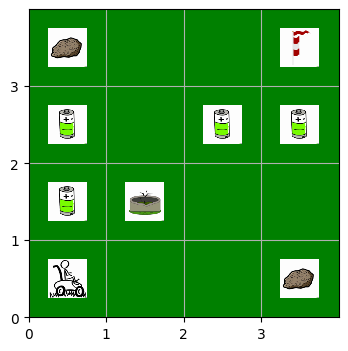

Action Taken: Down, Reached State: [0 0], Reward: 0
-----------------------------------------------------------------------------


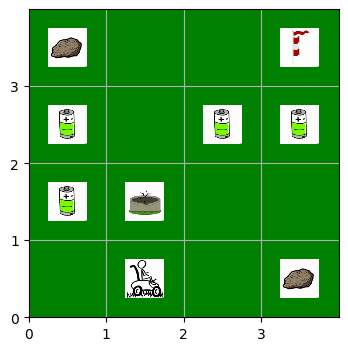

Action Taken: Right, Reached State: [1 0], Reward: 0
-----------------------------------------------------------------------------


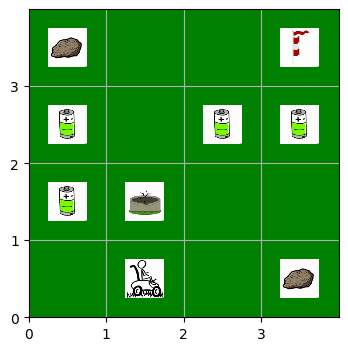

Action Taken: Down, Reached State: [1 0], Reward: 0
-----------------------------------------------------------------------------
Agent fell in pit


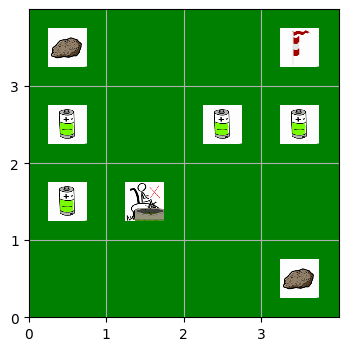

Action Taken: Up, Reached State: [1 1], Reward: -10
-----------------------------------------------------------------------------
Maximum Steps reached


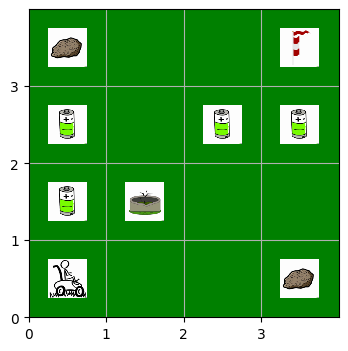

Action Taken: Left, Reached State: [0 0], Reward: 0
-----------------------------------------------------------------------------


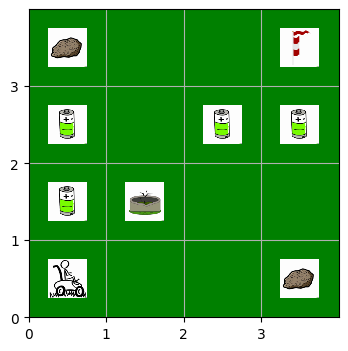

Action Taken: Left, Reached State: [0 0], Reward: 0
-----------------------------------------------------------------------------


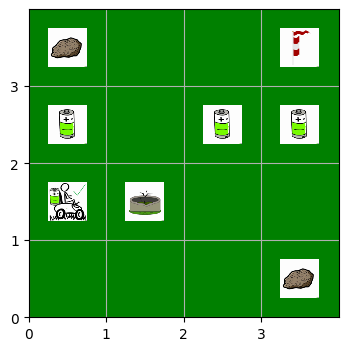

Action Taken: Up, Reached State: [0 1], Reward: 2
-----------------------------------------------------------------------------


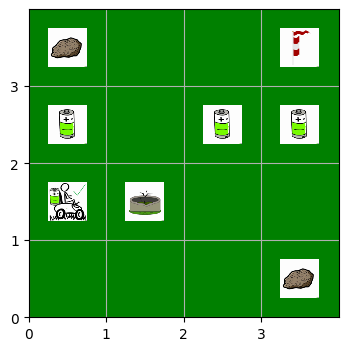

Action Taken: Left, Reached State: [0 1], Reward: 4
-----------------------------------------------------------------------------


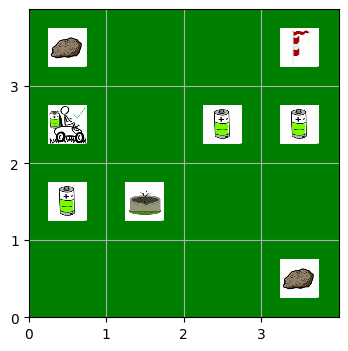

Action Taken: Up, Reached State: [0 2], Reward: 5
-----------------------------------------------------------------------------


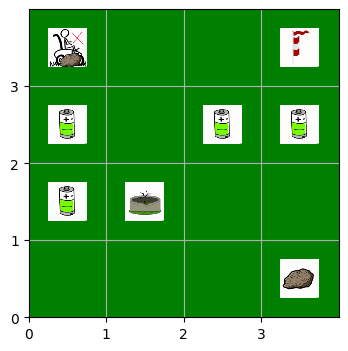

Action Taken: Up, Reached State: [0 3], Reward: 3
-----------------------------------------------------------------------------
Maximum Steps reached


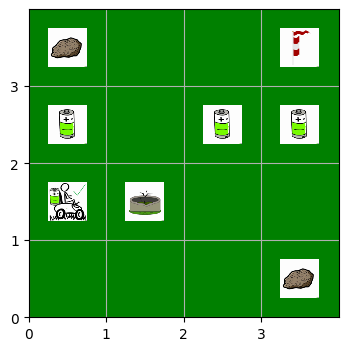

Action Taken: Up, Reached State: [0 1], Reward: 2
-----------------------------------------------------------------------------


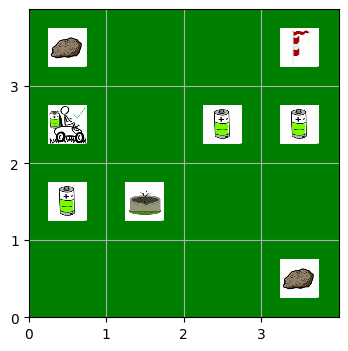

Action Taken: Up, Reached State: [0 2], Reward: 3
-----------------------------------------------------------------------------


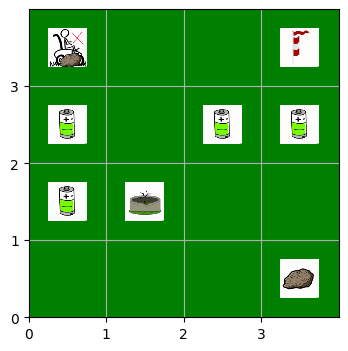

Action Taken: Up, Reached State: [0 3], Reward: 1
-----------------------------------------------------------------------------


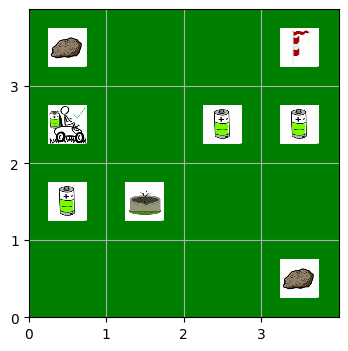

Action Taken: Down, Reached State: [0 2], Reward: 2
-----------------------------------------------------------------------------


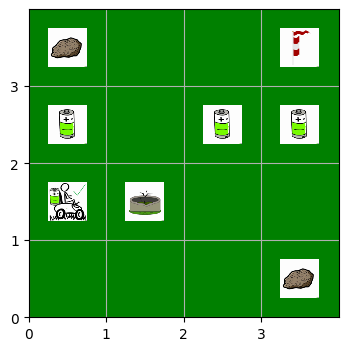

Action Taken: Down, Reached State: [0 1], Reward: 4
-----------------------------------------------------------------------------
Agent fell in pit


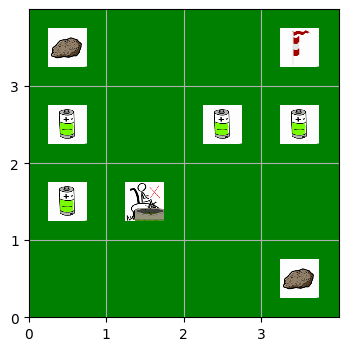

Action Taken: Right, Reached State: [1 1], Reward: -6
-----------------------------------------------------------------------------
Maximum Steps reached


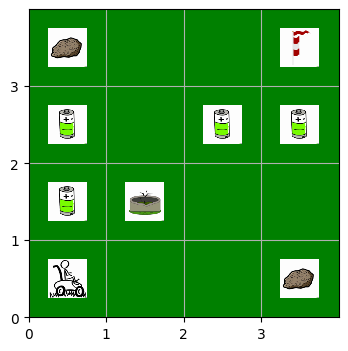

Action Taken: Down, Reached State: [0 0], Reward: 0
-----------------------------------------------------------------------------


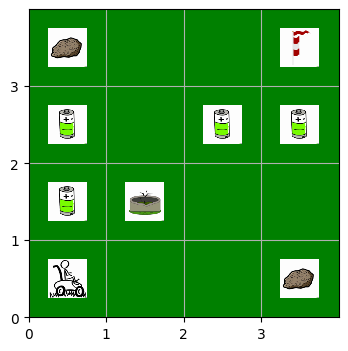

Action Taken: Down, Reached State: [0 0], Reward: 0
-----------------------------------------------------------------------------


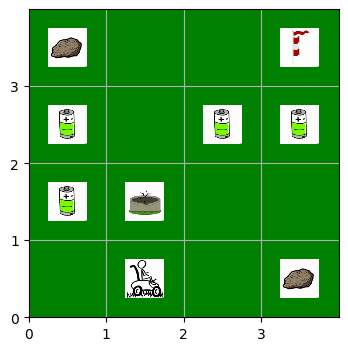

Action Taken: Right, Reached State: [1 0], Reward: 0
-----------------------------------------------------------------------------


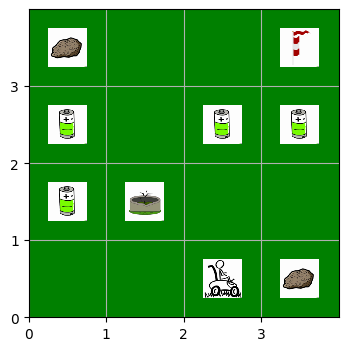

Action Taken: Right, Reached State: [2 0], Reward: 0
-----------------------------------------------------------------------------


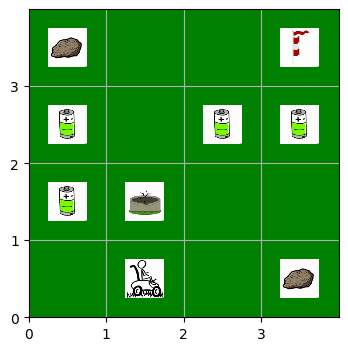

Action Taken: Left, Reached State: [1 0], Reward: 0
-----------------------------------------------------------------------------


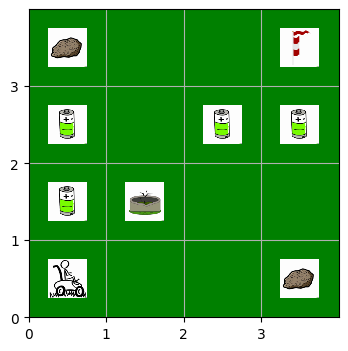

Action Taken: Left, Reached State: [0 0], Reward: 0
-----------------------------------------------------------------------------
Maximum Steps reached


In [ ]:
print("Initial Position:")
print("----------------")
env.reset()
env.render()
total_reward=0
for _ in range(30):
    action = env.action_space.sample()
    next_obs, reward, done, _ = env.step(action)
    env.render()
    total_reward+=reward
    action_str = ["Up", "Down", "Right", "Left"][action]
    print(f"Action Taken: {action_str}, Reached State: {next_obs}, Reward: {total_reward}")
    print("-----------------------------------------------------------------------------")
    if done==True:
      print("Maximum Steps reached")
      env.reset()
      total_reward=0




Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Episode 1/1000, Total Reward: 6
Episode 2/1000, Total Reward: 0
Agent fell in pit
Episode 3/1000, Total Reward: -6
Episode 4/1000, Total Reward: 5
Agent fell in pit
Agent fell in pit
Episode 5/1000, Total Reward: -18
Episode 6/1000, Total Reward: 6
Episode 7/1000, Total Reward: 0
Episode 8/1000, Total Reward: 0
Agent fell in pit
Agent fell in pit
Episode 9/1000, Total Reward: -14
Episode 10/1000, Total Reward: 2
Agent fell in pit
Episode 11/1000, Total Reward: -4
Agent fell in pit
Episode 12/1000, Total Reward: -8
Episode 13/1000, Total Reward: 0
Agent fell in pit
Agent fell in pit
Episode 14/1000, Total Reward: -18
Agent fell in pit
Episode 15/1000, Total Reward: -10
Episode 16/1000, Total Reward: 6
Agent fell in pit
Episode 17/100

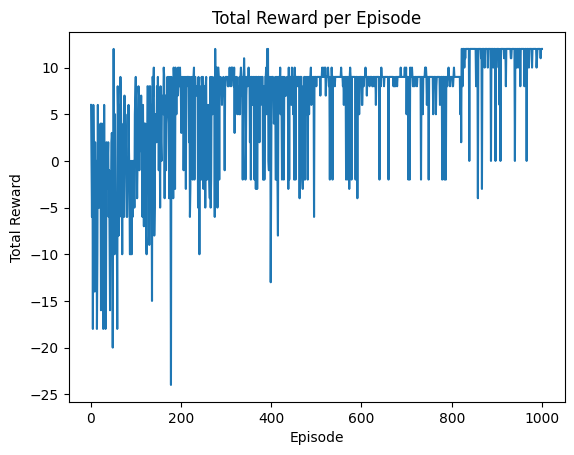

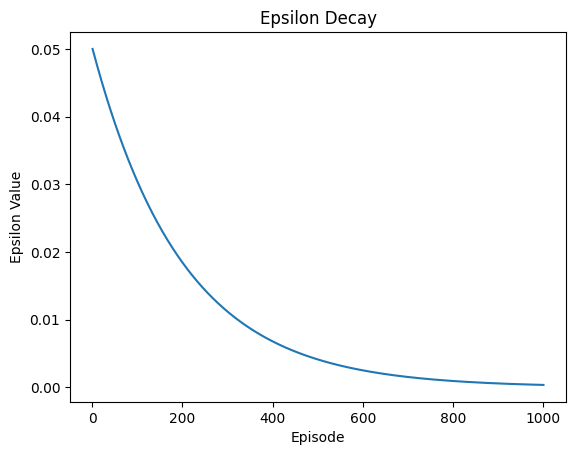

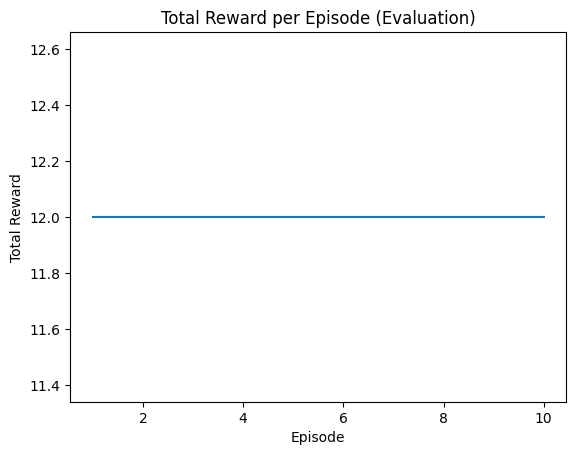

[12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


In [14]:
import numpy as np
import matplotlib.pyplot as plt
import gym

class SARSA:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon_start=1.0, epsilon_decay=0.995, epsilon_min=0.05):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon_start
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.Q = np.zeros((env.state_space.n, env.action_space.n))
        print("Initial Q-table:")
        print(self.Q)

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return int(np.random.choice(self.env.action_space.n))
        else:
          state_int = self.state_to_int(state)
          q_values = self.Q[state_int, :]


          max_actions = np.where(q_values == np.max(q_values))[0]
          return int(np.random.choice(max_actions))


    def state_to_int(self, state):

        x, y = state
        return x * self.env.grid_size + y

    def update_q_table(self, state, action, reward, next_state, next_action):
        state = self.state_to_int(state)
        action = int(action)
        next_state = self.state_to_int(next_state)
        next_action = int(next_action)

        current_value = self.Q[state, action]
        next_value = self.Q[next_state, next_action]
        updated_value = current_value + self.alpha * (reward + self.gamma * next_value - current_value)
        self.Q[state, action] = updated_value

    def train(self, num_episodes):
        total_rewards = []

        for episode in range(num_episodes):
            state = self.env.reset()
            action = self.choose_action(state)
            total_reward = 0

            for step in range(self.env.max_steps):
                next_state, reward, done, _ = self.env.step(action)
                next_action = self.choose_action(next_state)
                self.update_q_table(state, action, reward, next_state, next_action)

                state = next_state
                action = next_action
                total_reward += reward

                if done:
                    break

            total_rewards.append(total_reward)

            self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)


            print(f"Episode {episode + 1}/{num_episodes}, Total Reward: {total_reward}")

        return total_rewards



env = LawnmowerGridWorld()
sarsa_agent = SARSA(env)


num_episodes = 1000
total_rewards_sarsa = sarsa_agent.train(num_episodes)


print("\nTrained Q-table:")
print(sarsa_agent.Q)


plt.plot(range(1, num_episodes + 1), total_rewards_sarsa)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()

epsilon_values = [sarsa_agent.epsilon * sarsa_agent.epsilon_decay ** episode for episode in range(num_episodes)]
plt.plot(range(1, num_episodes + 1), epsilon_values)
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.title('Epsilon Decay')
plt.show()


num_evaluation_episodes = 10
total_rewards_eval = []

for _ in range(num_evaluation_episodes):
    state = env.reset()
    total_reward = 0

    while True:
        action = np.argmax(sarsa_agent.Q[state, :])
        state, reward, done, _ = env.step(action)
        total_reward += reward
        # env.render()
        if done:
            break

    total_rewards_eval.append(total_reward)


plt.plot(range(1, num_evaluation_episodes + 1), total_rewards_eval)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode (Evaluation)')
plt.show()
print(total_rewards_eval)

# **Hyper Tuning**

**Discount Factor**

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


------------------------------------------------------
Now the discount factor is set to :  0.9
Initial Q table
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit

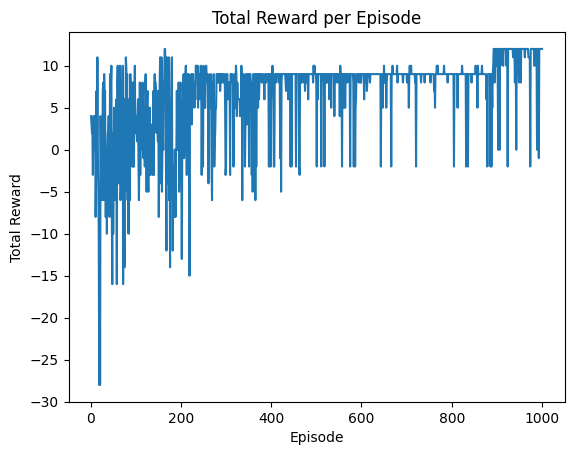

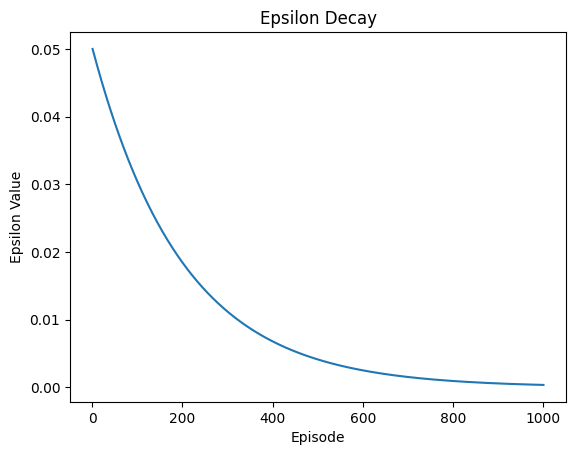

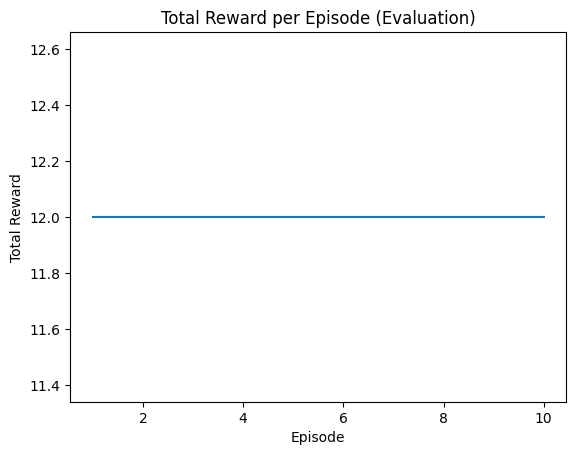

[12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
------------------------------------------------------
Now the discount factor is set to :  0.95
Initial Q table
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell 

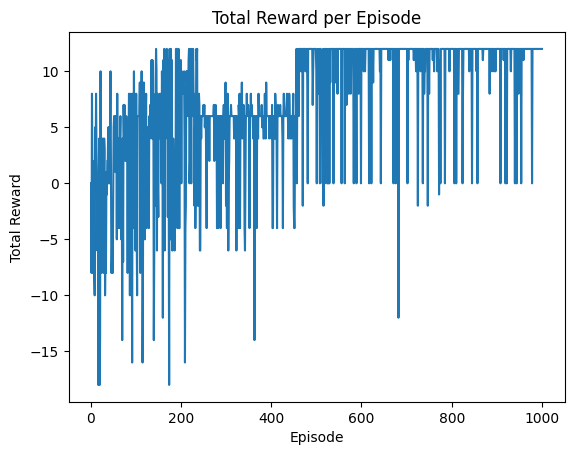

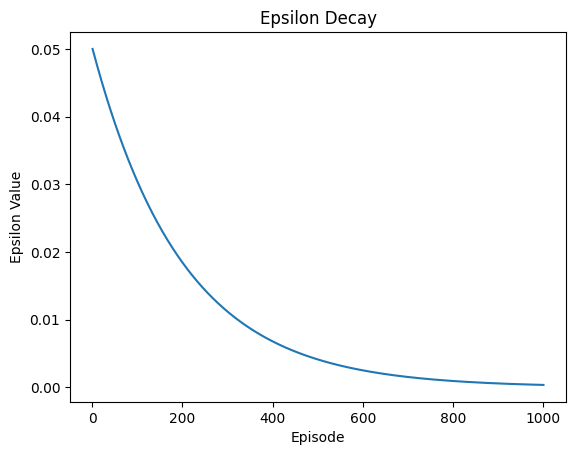

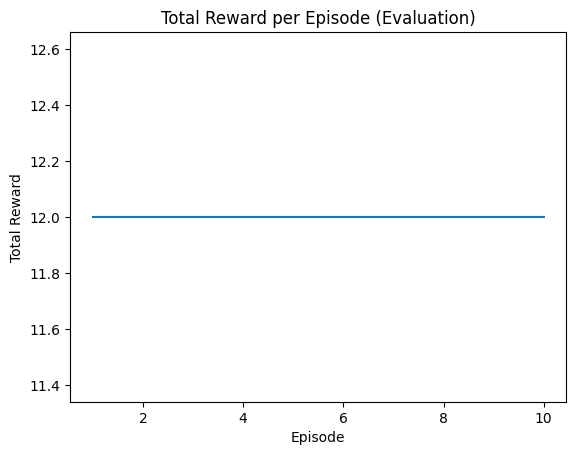

[12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
------------------------------------------------------
Now the discount factor is set to :  0.97
Initial Q table
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell 

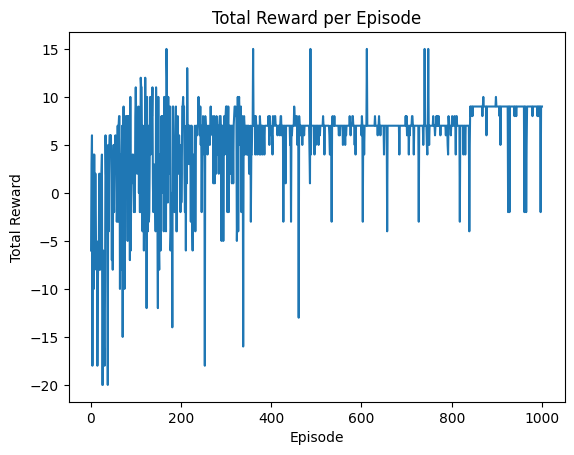

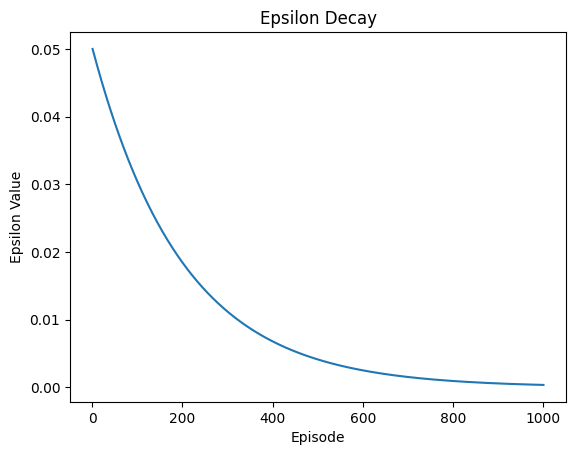

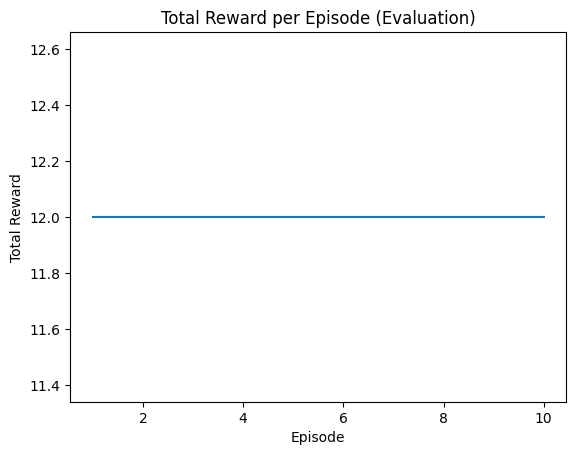

[12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


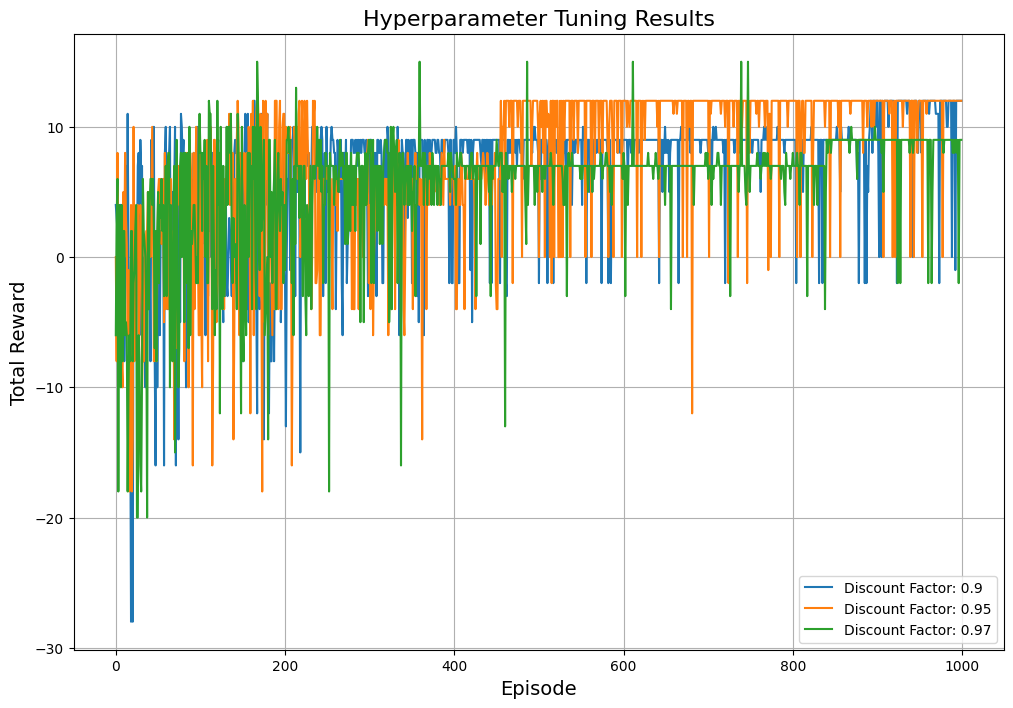

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

class SARSA:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon_start=1.0, epsilon_decay=0.995, epsilon_min=0.05):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon_start
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.Q = np.zeros((env.state_space.n, env.action_space.n))
        print("Initial Q table")
        print(self.Q)

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return int(np.random.choice(self.env.action_space.n))
        else:
          state_int = self.state_to_int(state)
          q_values = self.Q[state_int, :]


          max_actions = np.where(q_values == np.max(q_values))[0]
          return int(np.random.choice(max_actions))


    def state_to_int(self, state):

        x, y = state
        return x * self.env.grid_size + y

    def update_q_table(self, state, action, reward, next_state, next_action):
        state = self.state_to_int(state)
        action = int(action)
        next_state = self.state_to_int(next_state)
        next_action = int(next_action)

        current_value = self.Q[state, action]
        next_value = self.Q[next_state, next_action]
        updated_value = current_value + self.alpha * (reward + self.gamma * next_value - current_value)
        self.Q[state, action] = updated_value

    def train(self, num_episodes):
        total_rewards = []

        for episode in range(num_episodes):
            state = self.env.reset()
            action = self.choose_action(state)
            total_reward = 0

            for step in range(self.env.max_steps):
                next_state, reward, done, _ = self.env.step(action)
                next_action = self.choose_action(next_state)
                self.update_q_table(state, action, reward, next_state, next_action)

                state = next_state
                action = next_action
                total_reward += reward

                if done:
                    break

            total_rewards.append(total_reward)


            self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)



        return total_rewards

def hyperparameter_tuning(env, discount_factors, episodes=1000):
    results = defaultdict(list)

    for discount_factor in discount_factors:
        print("------------------------------------------------------")
        print("Now the discount factor is set to : ",discount_factor)
        sarsa_agent = SARSA(env, gamma=discount_factor)
        total_rewards = SARSA.train(sarsa_agent, num_episodes=episodes)
        print("final Q-table")
        print(sarsa_agent.Q)
        plt.plot(range(1, num_episodes + 1), total_rewards)
        plt.xlabel('Episode')
        plt.ylabel('Total Reward')
        plt.title('Total Reward per Episode')
        plt.show()

        epsilon_values = [sarsa_agent.epsilon * sarsa_agent.epsilon_decay ** episode for episode in range(num_episodes)]
        plt.plot(range(1, num_episodes + 1), epsilon_values)
        plt.xlabel('Episode')
        plt.ylabel('Epsilon Value')
        plt.title('Epsilon Decay')
        plt.show()
        num_evaluation_episodes = 10
        total_rewards_eval = []

        for _ in range(num_evaluation_episodes):
            state = env.reset()
            total_reward = 0

            while True:
                action = np.argmax(sarsa_agent.Q[state, :])
                state, reward, done, _ = env.step(action)
                total_reward += reward
                # env.render()
                if done:
                    break

            total_rewards_eval.append(total_reward)


        plt.plot(range(1, num_evaluation_episodes + 1), total_rewards_eval)
        plt.xlabel('Episode')
        plt.ylabel('Total Reward')
        plt.title('Total Reward per Episode (Evaluation)')
        plt.show()

        results['discount_factor'].append(discount_factor)
        results['total_rewards'].append(total_rewards)
        print(total_rewards_eval)
    return results

discount_factors = [0.9, 0.95, 0.97]


tuning_results = hyperparameter_tuning(env, discount_factors)


plt.figure(figsize=(12, 8))

for i, discount_factor in enumerate(discount_factors):
    label = f'Discount Factor: {discount_factor}'
    plt.plot(tuning_results['total_rewards'][i], label=label)

plt.xlabel('Episode', fontsize=14)
plt.ylabel('Total Reward', fontsize=14)
plt.title('Hyperparameter Tuning Results', fontsize=16)
plt.legend()
plt.grid()
plt.show()

**Epsilon Decay**

------------------------------------------------------
Now the epsilon decay factor is set to :  0.95
Initial q-table
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell 

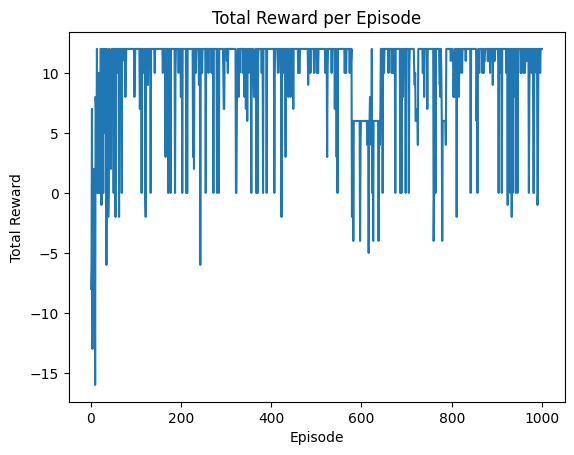

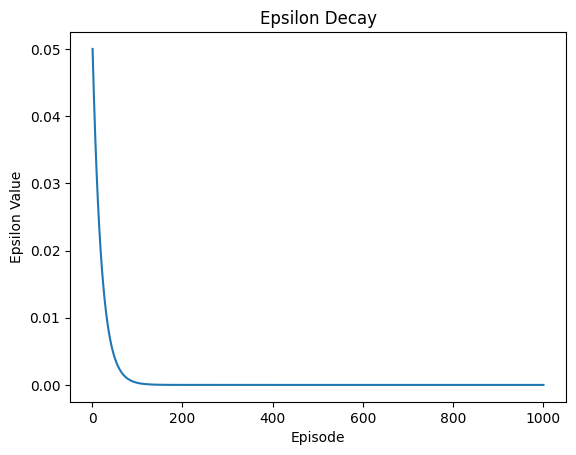

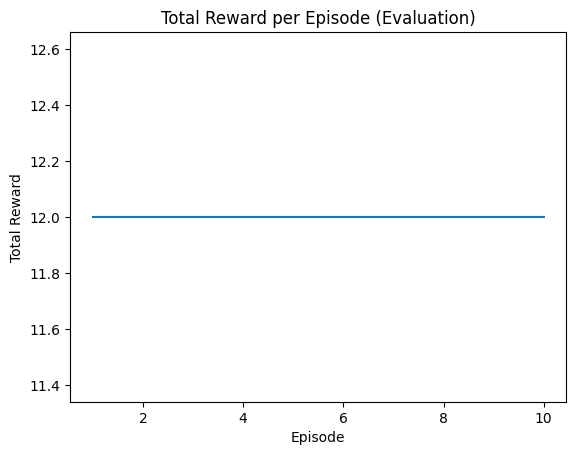

[12, 12, 12, 12, 12, 12, 12, 12, 12, 12]
------------------------------------------------------
Now the epsilon decay factor is set to :  0.98
Initial q-table
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent 

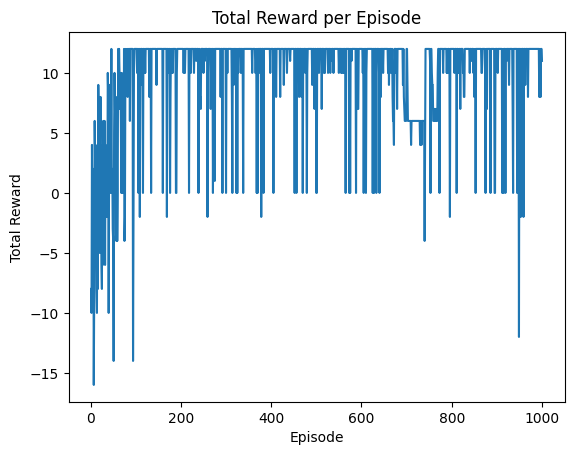

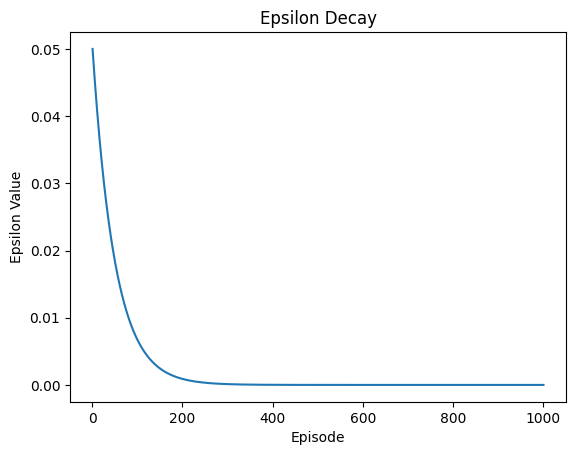

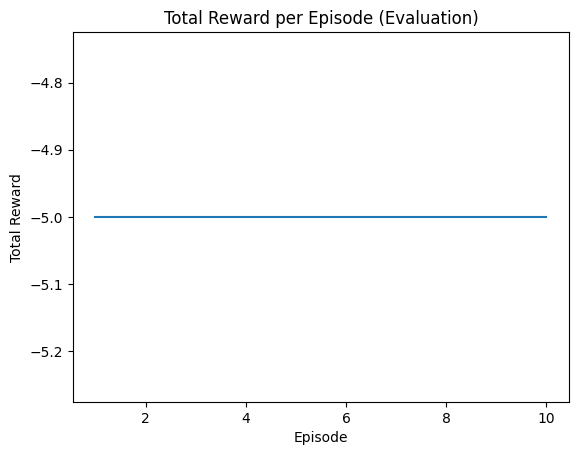

[-5, -5, -5, -5, -5, -5, -5, -5, -5, -5]
------------------------------------------------------
Now the epsilon decay factor is set to :  0.99
Initial q-table
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent fell in pit
Agent 

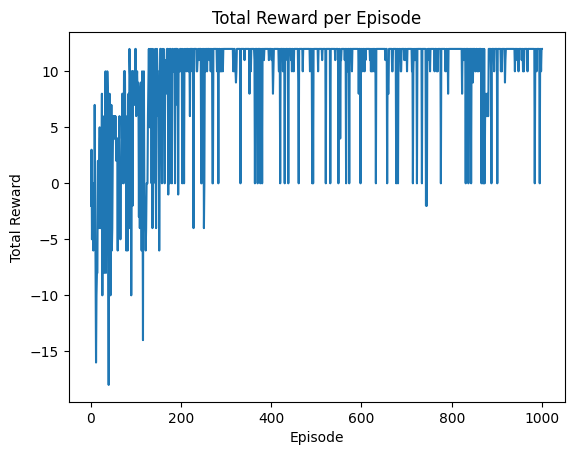

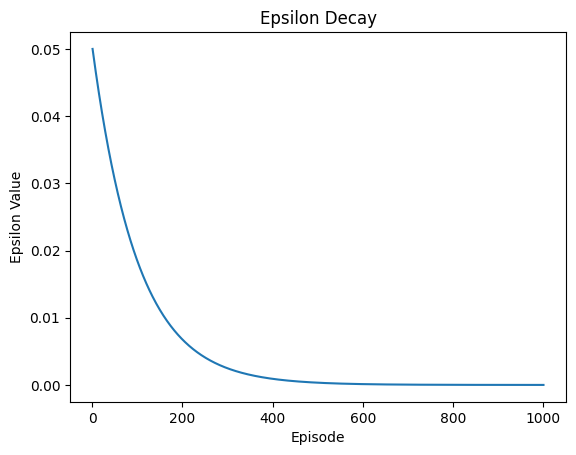

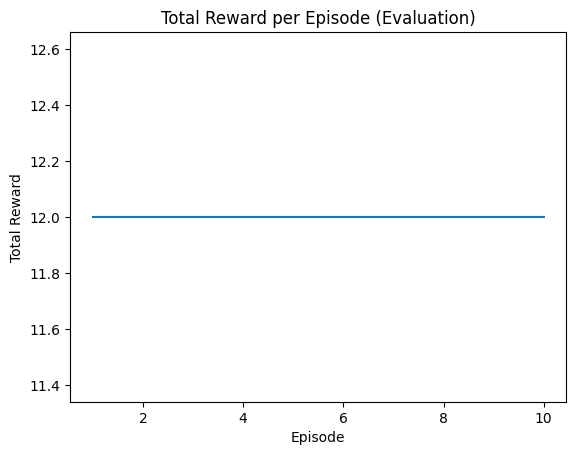

[12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


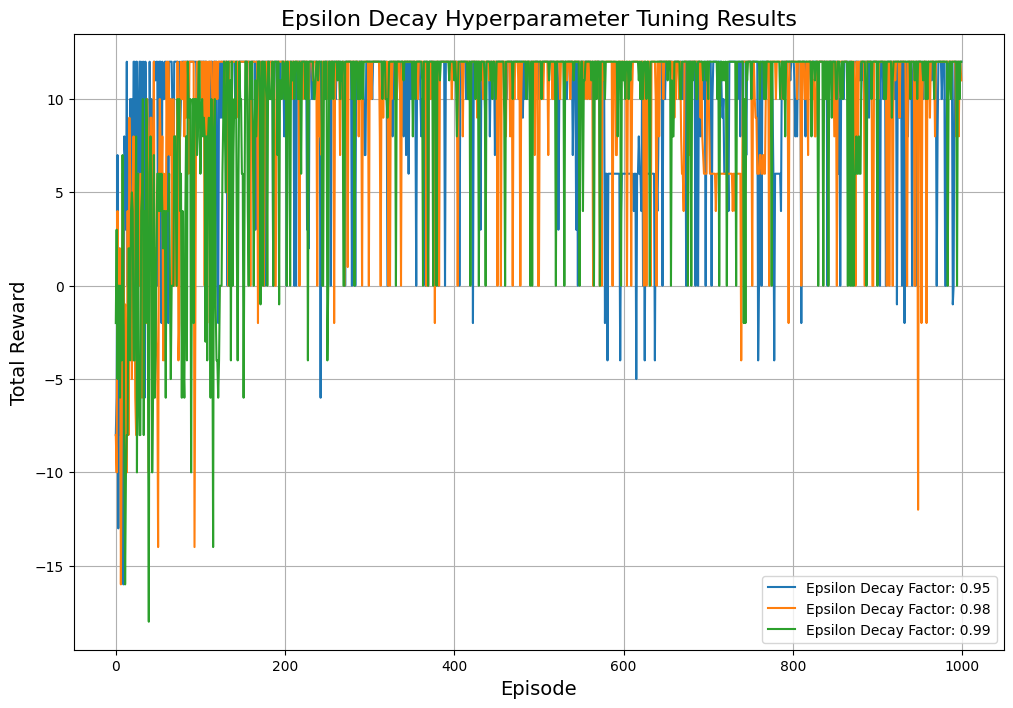

In [ ]:
class SARSA:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon_start=1.0, epsilon_decay=0.995, epsilon_min=0.05):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon_start
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.Q = np.zeros((env.state_space.n, env.action_space.n))
        print("Initial q-table")
        print(self.Q)

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return int(np.random.choice(self.env.action_space.n))
        else:
          state_int = self.state_to_int(state)
          q_values = self.Q[state_int, :]


          max_actions = np.where(q_values == np.max(q_values))[0]
          return int(np.random.choice(max_actions))


    def state_to_int(self, state):

        x, y = state
        return x * self.env.grid_size + y

    def update_q_table(self, state, action, reward, next_state, next_action):
        state = self.state_to_int(state)
        action = int(action)
        next_state = self.state_to_int(next_state)
        next_action = int(next_action)

        current_value = self.Q[state, action]
        next_value = self.Q[next_state, next_action]
        updated_value = current_value + self.alpha * (reward + self.gamma * next_value - current_value)
        self.Q[state, action] = updated_value

    def train(self, num_episodes):
        total_rewards = []

        for episode in range(num_episodes):
            state = self.env.reset()
            action = self.choose_action(state)
            total_reward = 0

            for step in range(self.env.max_steps):
                next_state, reward, done, _ = self.env.step(action)
                next_action = self.choose_action(next_state)
                self.update_q_table(state, action, reward, next_state, next_action)

                state = next_state
                action = next_action
                total_reward += reward

                if done:
                    break

            total_rewards.append(total_reward)


            self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)


        return total_rewards

def hyperparameter_tuning(env, epsilon_decay_factors, episodes=1000):
    results = defaultdict(list)

    for epsilon_decay_factor in epsilon_decay_factors:
        print("------------------------------------------------------")
        print("Now the epsilon decay factor is set to : ", epsilon_decay_factor)

        sarsa_agent = SARSA(env, epsilon_decay=epsilon_decay_factor)


        total_rewards = SARSA.train(sarsa_agent, num_episodes=episodes)
        print("Final Q-table")
        print(sarsa_agent.Q)
        plt.plot(range(1, num_episodes + 1), total_rewards)
        plt.xlabel('Episode')
        plt.ylabel('Total Reward')
        plt.title('Total Reward per Episode')
        plt.show()

        epsilon_values = [sarsa_agent.epsilon * sarsa_agent.epsilon_decay ** episode for episode in range(num_episodes)]
        plt.plot(range(1, num_episodes + 1), epsilon_values)
        plt.xlabel('Episode')
        plt.ylabel('Epsilon Value')
        plt.title('Epsilon Decay')
        plt.show()
        num_evaluation_episodes = 10
        total_rewards_eval = []

        for _ in range(num_evaluation_episodes):
            state = env.reset()
            total_reward = 0

            while True:
                action = np.argmax(sarsa_agent.Q[state, :])
                state, reward, done, _ = env.step(action)
                total_reward += reward
                # env.render()
                if done:
                    break

            total_rewards_eval.append(total_reward)


        plt.plot(range(1, num_evaluation_episodes + 1), total_rewards_eval)
        plt.xlabel('Episode')
        plt.ylabel('Total Reward')
        plt.title('Total Reward per Episode (Evaluation)')
        plt.show()
        print(total_rewards_eval)


        results['epsilon_decay_factor'].append(epsilon_decay_factor)
        results['total_rewards'].append(total_rewards)

    return results


epsilon_decay_factors = [0.95, 0.98, 0.99]


tuning_results = hyperparameter_tuning(env, epsilon_decay_factors)


plt.figure(figsize=(12, 8))

for i, epsilon_decay_factor in enumerate(epsilon_decay_factors):
    label = f'Epsilon Decay Factor: {epsilon_decay_factor}'
    plt.plot(tuning_results['total_rewards'][i], label=label)

plt.xlabel('Episode', fontsize=14)
plt.ylabel('Total Reward', fontsize=14)
plt.title('Epsilon Decay Hyperparameter Tuning Results', fontsize=16)
plt.legend()
plt.grid()
plt.show()

In [ ]:
# Best Epsilon Decay factor is 0.95
# and best discount factor is 0.95

Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Episode 1/1000, Total Reward: 5
Agent fell in pit
Episode 2/1000, Total Reward: -10
Agent fell in pit
Episode 3/1000, Total Reward: -10
Episode 4/1000, Total Reward: 9
Episode 5/1000, Total Reward: 2
Episode 6/1000, Total Reward: 9
Agent fell in pit
Episode 7/1000, Total Reward: -7
Episode 8/1000, Total Reward: 10
Episode 9/1000, Total Reward: 1
Episode 10/1000, Total Reward: 8
Episode 11/1000, Total Reward: 12
Episode 12/1000, Total Reward: 6
Episode 13/1000, Total Reward: 11
Agent fell in pit
Episode 14/1000, Total Reward: -4
Agent fell in pit
Episode 15/1000, Total Reward: -4
Agent fell in pit
Episode 16/1000, Total Reward: -6
Agent fell in pit
Episode 17/1000, Total Reward: -5
Agent fell in pit
Episode 18/1000, Total Reward: -4


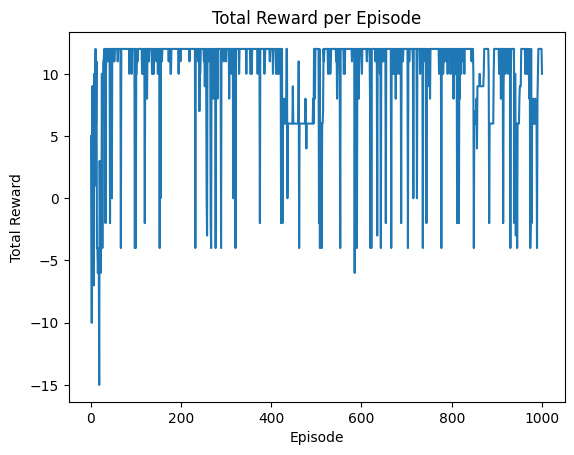

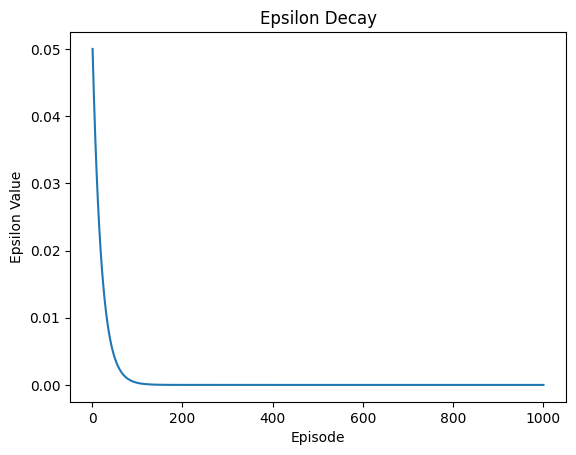

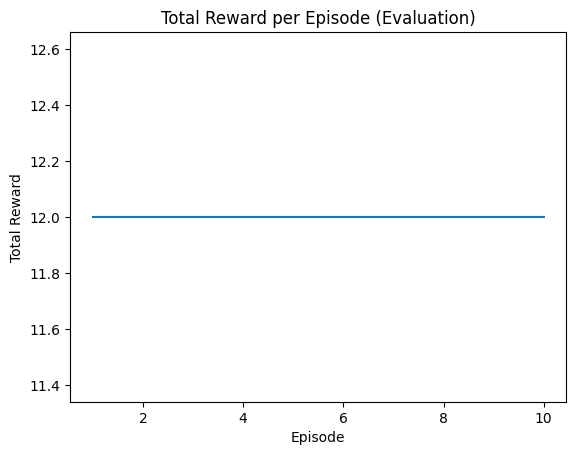

[12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import gym

class SARSA:
    def __init__(self, env, alpha=0.1, gamma=0.95, epsilon_start=1.0, epsilon_decay=0.95, epsilon_min=0.05):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon_start
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.Q = np.zeros((env.state_space.n, env.action_space.n))
        print("Initial Q-table:")
        print(self.Q)

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return int(np.random.choice(self.env.action_space.n))
        else:
          state_int = self.state_to_int(state)
          q_values = self.Q[state_int, :]


          max_actions = np.where(q_values == np.max(q_values))[0]
          return int(np.random.choice(max_actions))


    def state_to_int(self, state):

        x, y = state
        return x * self.env.grid_size + y

    def update_q_table(self, state, action, reward, next_state, next_action):
        state = self.state_to_int(state)
        action = int(action)
        next_state = self.state_to_int(next_state)
        next_action = int(next_action)

        current_value = self.Q[state, action]
        next_value = self.Q[next_state, next_action]
        updated_value = current_value + self.alpha * (reward + self.gamma * next_value - current_value)
        self.Q[state, action] = updated_value

    def train(self, num_episodes):
        total_rewards = []

        for episode in range(num_episodes):
            state = self.env.reset()
            action = self.choose_action(state)
            total_reward = 0

            for step in range(self.env.max_steps):
                next_state, reward, done, _ = self.env.step(action)
                next_action = self.choose_action(next_state)
                self.update_q_table(state, action, reward, next_state, next_action)

                state = next_state
                action = next_action
                total_reward += reward

                if done:
                    break

            total_rewards.append(total_reward)

            self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)


            print(f"Episode {episode + 1}/{num_episodes}, Total Reward: {total_reward}")

        return total_rewards



env = LawnmowerGridWorld()
sarsa_agent = SARSA(env)


num_episodes = 1000
total_rewards = sarsa_agent.train(num_episodes)


print("\nTrained Q-table:")
print(sarsa_agent.Q)


plt.plot(range(1, num_episodes + 1), total_rewards)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode')
plt.show()


epsilon_values = [sarsa_agent.epsilon * sarsa_agent.epsilon_decay ** episode for episode in range(num_episodes)]
plt.plot(range(1, num_episodes + 1), epsilon_values)
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.title('Epsilon Decay')
plt.show()


num_evaluation_episodes = 10
total_rewards_eval = []

for _ in range(num_evaluation_episodes):
    state = env.reset()
    total_reward = 0

    while True:
        action = np.argmax(sarsa_agent.Q[state, :])
        state, reward, done, _ = env.step(action)
        total_reward += reward
        # env.render()
        if done:
            break

    total_rewards_eval.append(total_reward)


plt.plot(range(1, num_evaluation_episodes + 1), total_rewards_eval)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode (Evaluation)')
plt.show()
print(total_rewards_eval)

## Part 3
# Double Q-Learning

Initial Q1-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q2-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Agent fell in pit
Episode 1/1000, Total Reward: -8
Episode 2/1000, Total Reward: 0
Agent fell in pit
Episode 3/1000, Total Reward: -7
Agent fell in pit
Agent fell in pit
Episode 4/1000, Total Reward: -20
Episode 5/1000, Total Reward: 0
Agent fell in pit
Episode 6/1000, Total Reward: -8
Agent fell in pit
Episode 7/1000, Total Reward: -8
Agent fell in pit
Episode 8/1000, Total Reward: -8
Episode 9/1000, Total Reward: 2
Episode 10/1000, Total Reward: 4
Agent fell in pit
Episode 11

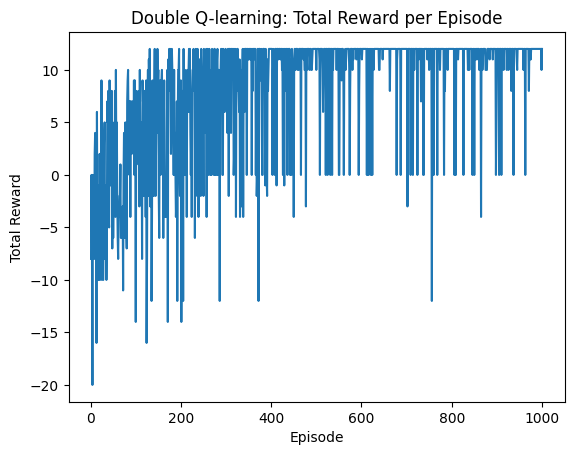

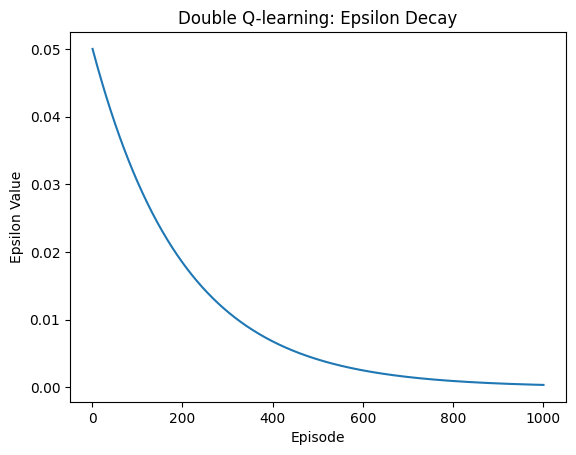

Episode 1, Total Reward: -5
Episode 2, Total Reward: -5
Episode 3, Total Reward: -5
Episode 4, Total Reward: -5
Episode 5, Total Reward: -5
Episode 6, Total Reward: -5
Episode 7, Total Reward: -5
Episode 8, Total Reward: -5
Episode 9, Total Reward: -5
Episode 10, Total Reward: -5


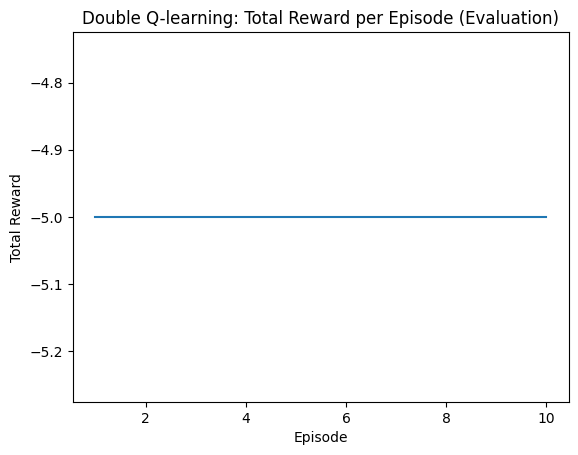

[-5, -5, -5, -5, -5, -5, -5, -5, -5, -5]


In [16]:
class DoubleQLearning:
    def __init__(self, env, alpha=0.1, gamma=0.99, epsilon_start=1.0, epsilon_decay=0.995, epsilon_min=0.05):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon_start
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.Q1 = np.zeros((env.state_space.n, env.action_space.n))
        self.Q2 = np.zeros((env.state_space.n, env.action_space.n))
        print("Initial Q1-table:")
        print(self.Q1)
        print("Initial Q2-table:")
        print(self.Q2)

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return int(np.random.choice(self.env.action_space.n))
        else:
            state_int = self.state_to_int(state)
            q_values = self.Q1[state_int, :] + self.Q2[state_int, :]
            max_actions = np.where(q_values == np.max(q_values))[0]
            return int(np.random.choice(max_actions))

    def state_to_int(self, state):
        x, y = state
        return x * self.env.grid_size + y

    def update_q_tables(self, state, action, reward, next_state):
        state_int = self.state_to_int(state)
        action = int(action)
        next_state_int = self.state_to_int(next_state)
        next_action = self.choose_action(next_state)
        if np.random.rand() < 0.5:
            next_value = self.Q1[next_state_int, next_action]
            self.Q1[state_int, action] += self.alpha * (reward + self.gamma * next_value - self.Q1[state_int, action])
        else:
            next_value = self.Q2[next_state_int, next_action]
            self.Q2[state_int, action] += self.alpha * (reward + self.gamma * next_value - self.Q2[state_int, action])

    def train(self, num_episodes):
        total_rewards = []

        for episode in range(num_episodes):
            state = self.env.reset()
            action = self.choose_action(state)
            total_reward = 0

            for step in range(self.env.max_steps):
                next_state, reward, done, _ = self.env.step(action)
                self.update_q_tables(state, action, reward, next_state)

                state = next_state
                action = self.choose_action(state)
                total_reward += reward

                if done:
                    break

            total_rewards.append(total_reward)

            self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)

            print(f"Episode {episode + 1}/{num_episodes}, Total Reward: {total_reward}")

        return total_rewards


env = LawnmowerGridWorld()

agent = DoubleQLearning(env)


num_episodes = 1000
total_rewards_d = agent.train(num_episodes)


print("Trained Q-table 1:")
print(agent.Q1)

print("Trained Q-table 2:")
print(agent.Q2)


plt.plot(range(1, num_episodes + 1), total_rewards_d)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Double Q-learning: Total Reward per Episode')
plt.show()


epsilon_values = [agent.epsilon * agent.epsilon_decay ** episode for episode in range(num_episodes)]
plt.plot(range(1, num_episodes + 1), epsilon_values)
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.title('Double Q-learning: Epsilon Decay')
plt.show()


num_evaluation_episodes = 10
total_rewards_eval = []

for episode in range(num_evaluation_episodes):
    state = env.reset()
    total_reward = 0
    while True:
        action = np.argmax(agent.Q1[state, :] + agent.Q2[state, :])
        next_state, reward, done, _ = env.step(action)
        total_reward += reward
        if done:
            break

    total_rewards_eval.append(total_reward)
    print(f"Episode {episode + 1}, Total Reward: {total_reward}")




plt.plot(range(1, num_evaluation_episodes + 1), total_rewards_eval)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Double Q-learning: Total Reward per Episode (Evaluation)')
plt.show()

print(total_rewards_eval)

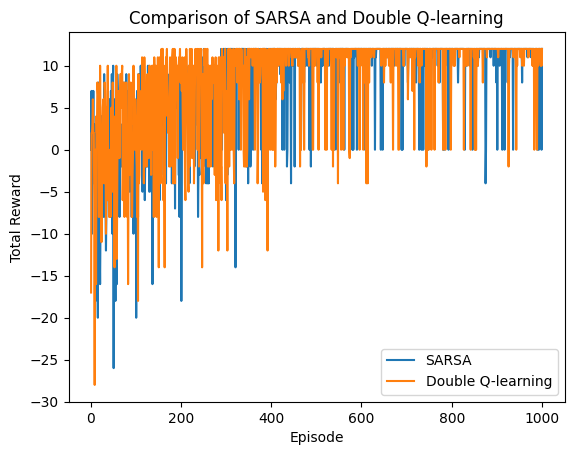

In [11]:
plt.plot(range(1, num_episodes + 1), total_rewards_sarsa, label='SARSA')
S
plt.plot(range(1, num_episodes + 1), total_rewards_d, label='Double Q-learning')

plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Comparison of SARSA and Double Q-learning')
plt.legend()
plt.show()

**Hyper tuning**

**Epsilon Decay factors**

------------------------------------------------------
Now the epsilon decay factor is set to: 0.95
Initial Q1-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q2-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Episode 1/1000, Total Reward: 5
Episode 2/1000, Total Reward: 0
Episode 3/1000, Total Reward: 7
Episode 4/1000, Total Reward: 9
Agent fell in pit
Episode 5/1000, Total Reward: -6
Episode 6/1000, Total Reward: 5
Agent fell in pit
Episode 7/1000, Total Reward: -6
Agent fell in pit
Episode 8/1000, Total Reward: -9
Agent fell in pit
Episode 9/1000, Total Reward: -2
Agent fell in pit


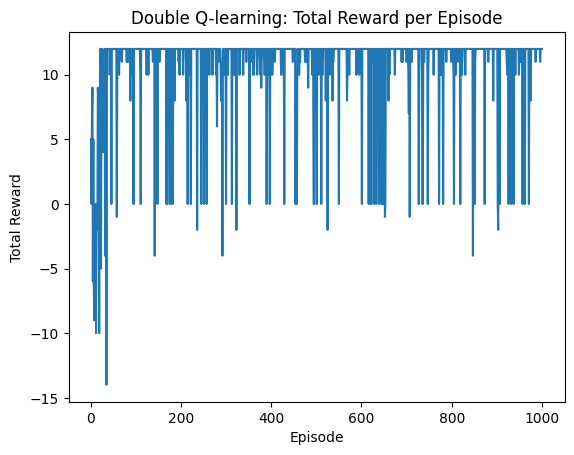

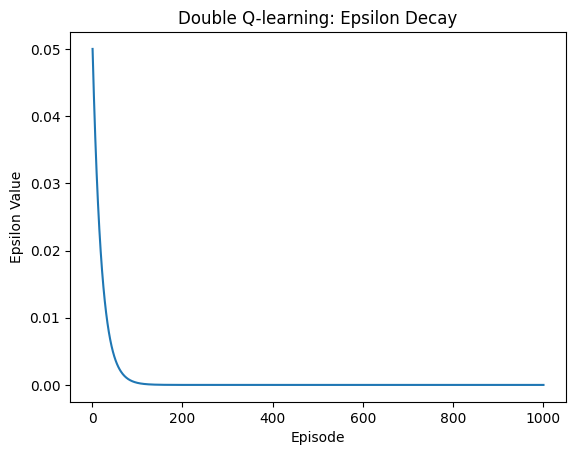

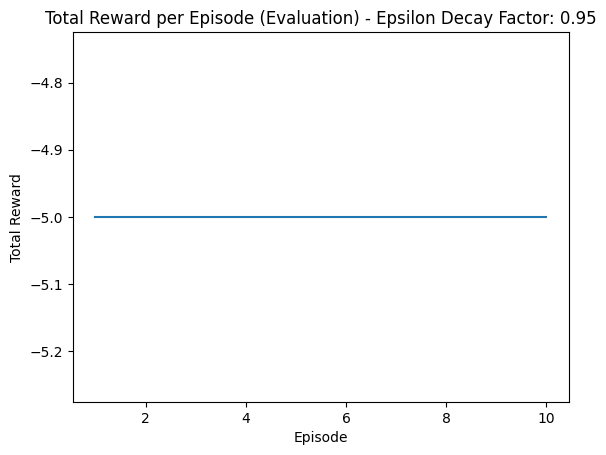

------------------------------------------------------
Now the epsilon decay factor is set to: 0.9
Initial Q1-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q2-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Episode 1/1000, Total Reward: 6
Episode 2/1000, Total Reward: 2
Episode 3/1000, Total Reward: 5
Episode 4/1000, Total Reward: 6
Agent fell in pit
Agent fell in pit
Episode 5/1000, Total Reward: -20
Episode 6/1000, Total Reward: 4
Episode 7/1000, Total Reward: 4
Agent fell in pit
Episode 8/1000, Total Reward: -8
Episode 9/1000, Total Reward: 6
Agent fell in pit
Episode 10/1000, Tot

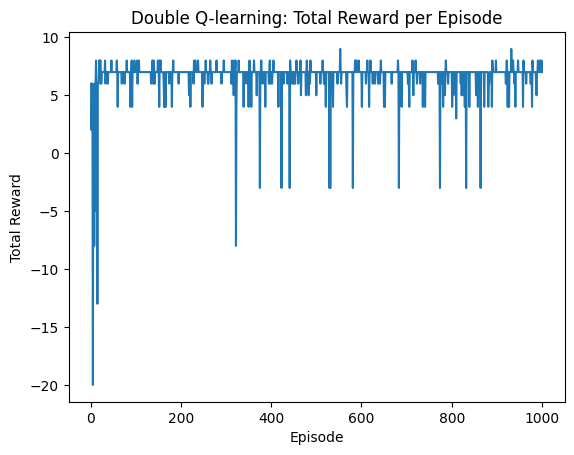

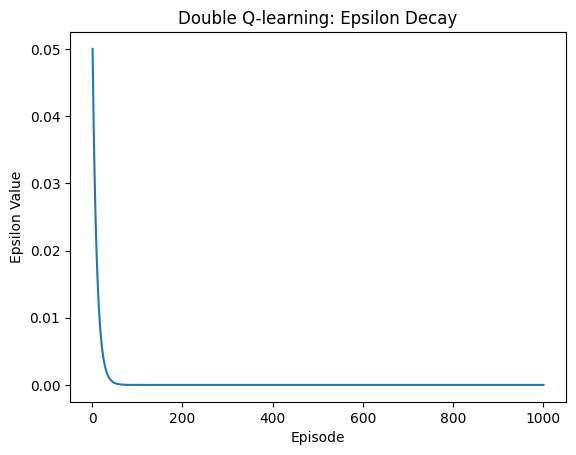

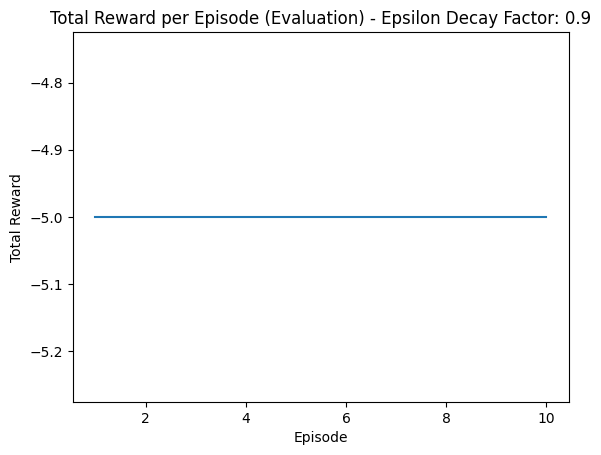

------------------------------------------------------
Now the epsilon decay factor is set to: 0.99
Initial Q1-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q2-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Episode 1/1000, Total Reward: 3
Episode 2/1000, Total Reward: -1
Episode 3/1000, Total Reward: 10
Agent fell in pit
Agent fell in pit
Episode 4/1000, Total Reward: -18
Episode 5/1000, Total Reward: 4
Agent fell in pit
Agent fell in pit
Agent fell in pit
Episode 6/1000, Total Reward: -30
Agent fell in pit
Episode 7/1000, Total Reward: -4
Agent fell in pit
Episode 8/1000, Total Rew

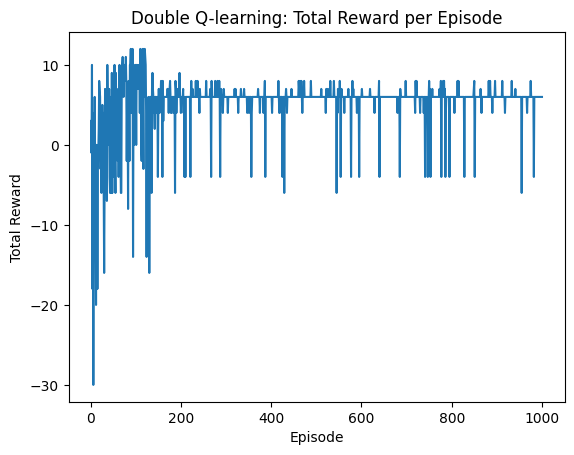

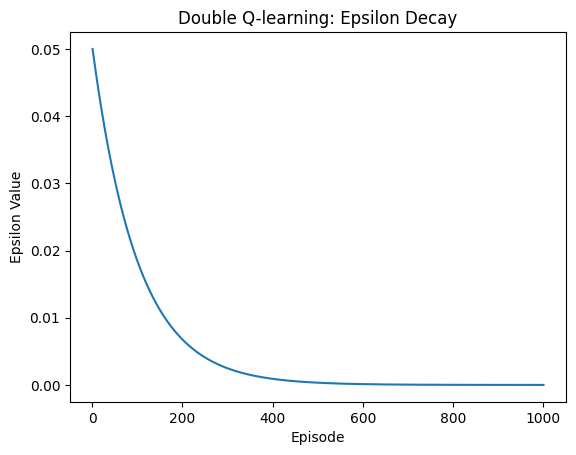

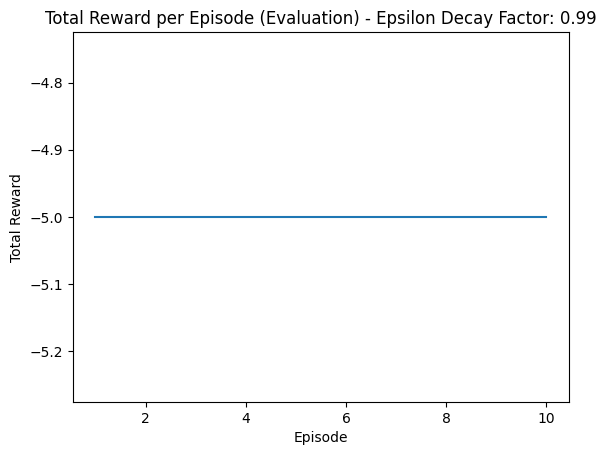

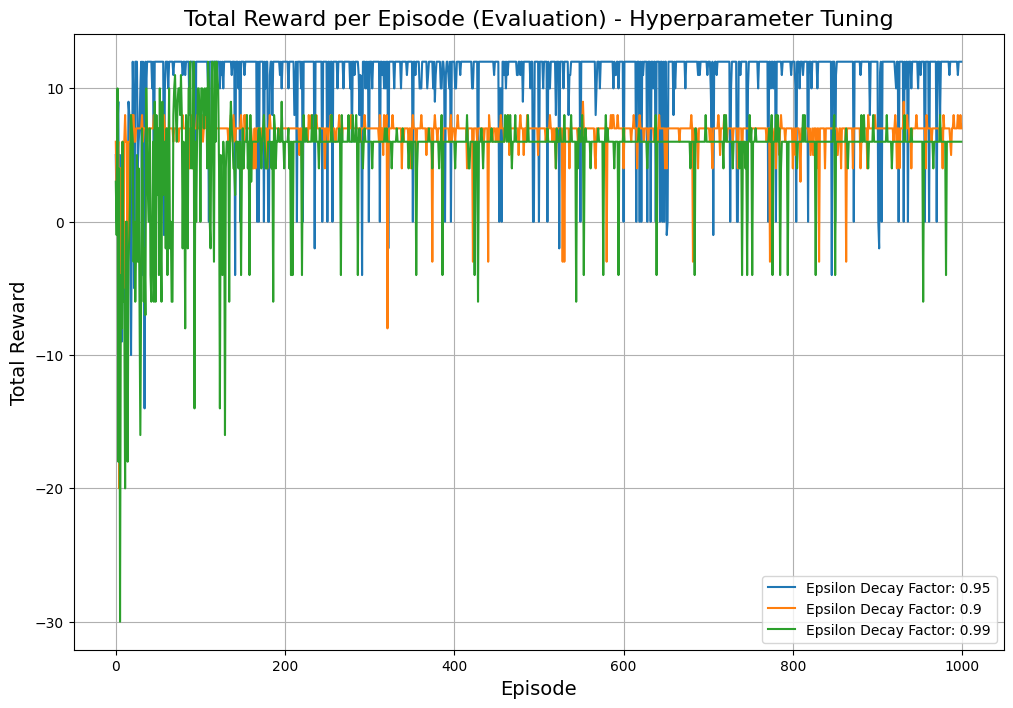

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from collections import defaultdict

class DoubleQLearningAgent:
    def __init__(self, env, alpha=0.1, gamma=0.95, epsilon_start=1.0, epsilon_decay=0.98, epsilon_min=0.05):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon_start
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.Q1 = np.zeros((env.state_space.n, env.action_space.n))
        self.Q2 = np.zeros((env.state_space.n, env.action_space.n))
        print("Initial Q1-table:")
        print(self.Q1)
        print("Initial Q2-table:")
        print(self.Q2)

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return int(np.random.choice(self.env.action_space.n))
        else:
            state_int = self.state_to_int(state)
            q_values = self.Q1[state_int, :] + self.Q2[state_int, :]
            max_actions = np.where(q_values == np.max(q_values))[0]
            return int(np.random.choice(max_actions))

    def state_to_int(self, state):
        x, y = state
        return x * self.env.grid_size + y

    def update_q_tables(self, state, action, reward, next_state):
        state_int = self.state_to_int(state)
        action = int(action)


        if np.random.rand() < 0.5:
            Q1, Q2 = self.Q1, self.Q2
        else:
            Q1, Q2 = self.Q2, self.Q1


        next_state_int = self.state_to_int(next_state)
        next_action = self.choose_action(next_state)
        if np.random.rand() < 0.5:
            next_value = Q1[next_state_int, next_action]
            Q1[state_int, action] += self.alpha * (reward + self.gamma * next_value - Q1[state_int, action])
        else:
            next_value = Q2[next_state_int, next_action]
            Q2[state_int, action] += self.alpha * (reward + self.gamma * next_value - Q2[state_int, action])

    def train(self, num_episodes):
        total_rewards = []

        for episode in range(num_episodes):
            state = self.env.reset()
            action = self.choose_action(state)
            total_reward = 0

            for step in range(self.env.max_steps):
                next_state, reward, done, _ = self.env.step(action)
                self.update_q_tables(state, action, reward, next_state)

                state = next_state
                action = self.choose_action(state)
                total_reward += reward

                if done:
                    break

            total_rewards.append(total_reward)

            self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)
            print(f"Episode {episode + 1}/{num_episodes}, Total Reward: {total_reward}")

        return total_rewards

def hyperparameter_tuning_epsilon_decay(env, epsilon_decay_factors, episodes=1000):
    results = defaultdict(list)

    for epsilon_decay_factor in epsilon_decay_factors:
        print("------------------------------------------------------")
        print("Now the epsilon decay factor is set to:", epsilon_decay_factor)

        agent = DoubleQLearningAgent(env, epsilon_decay=epsilon_decay_factor)
        total_rewards = agent.train(num_episodes=episodes)

        print("Trained Q-table 1:")
        print(agent.Q1)

        print("Trained Q-table 2:")
        print(agent.Q2)

        plt.plot(range(1, num_episodes + 1), total_rewards)
        plt.xlabel('Episode')
        plt.ylabel('Total Reward')
        plt.title('Double Q-learning: Total Reward per Episode')
        plt.show()


        epsilon_values = [agent.epsilon * agent.epsilon_decay ** episode for episode in range(num_episodes)]
        plt.plot(range(1, num_episodes + 1), epsilon_values)
        plt.xlabel('Episode')
        plt.ylabel('Epsilon Value')
        plt.title('Double Q-learning: Epsilon Decay')
        plt.show()
        num_evaluation_episodes = 10
        total_rewards_eval = []

        for _ in range(num_evaluation_episodes):
            state = env.reset()
            total_reward = 0

            while True:
                action = np.argmax(agent.Q1[state, :] + agent.Q2[state, :])
                next_state, reward, done, _ = env.step(action)
                total_reward += reward

                if done:
                    break

            total_rewards_eval.append(total_reward)

        results['epsilon_decay_factor'].append(epsilon_decay_factor)
        results['total_rewards'].append(total_rewards)
        results['total_rewards_eval'].append(total_rewards_eval)


        plt.plot(range(1, num_evaluation_episodes + 1), total_rewards_eval)
        plt.xlabel('Episode')
        plt.ylabel('Total Reward')
        plt.title(f'Total Reward per Episode (Evaluation) - Epsilon Decay Factor: {epsilon_decay_factor}')
        plt.show()

    return results

env = LawnmowerGridWorld()


epsilon_decay_factors = [0.95, 0.9, 0.99]


tuning_results_epsilon_decay = hyperparameter_tuning_epsilon_decay(env, epsilon_decay_factors)


plt.figure(figsize=(12, 8))

for i, epsilon_decay_factor in enumerate(epsilon_decay_factors):
    label = f'Epsilon Decay Factor: {epsilon_decay_factor}'
    plt.plot(tuning_results_epsilon_decay['total_rewards'][i], label=label)

plt.xlabel('Episode', fontsize=14)
plt.ylabel('Total Reward', fontsize=14)
plt.title('Total Reward per Episode (Evaluation) - Hyperparameter Tuning', fontsize=16)
plt.legend()
plt.grid()
plt.show()


**Discount Factors**

------------------------------------------------------
Now the discount factor is set to: 0.92
Initial Q1-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q2-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Episode 1/1000, Total Reward: 5
Episode 2/1000, Total Reward: 7
Episode 3/1000, Total Reward: 4
Agent fell in pit
Episode 4/1000, Total Reward: -6
Agent fell in pit
Episode 5/1000, Total Reward: -7
Episode 6/1000, Total Reward: 0
Episode 7/1000, Total Reward: 0
Episode 8/1000, Total Reward: 6
Episode 9/1000, Total Reward: 10
Episode 10/1000, Total Reward: -1
Agent fell in pit
Episode 

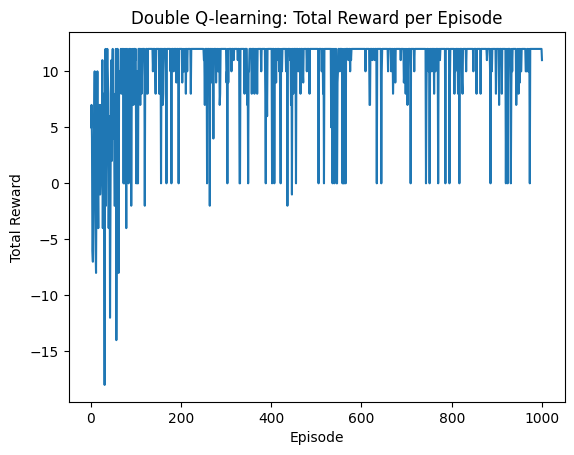

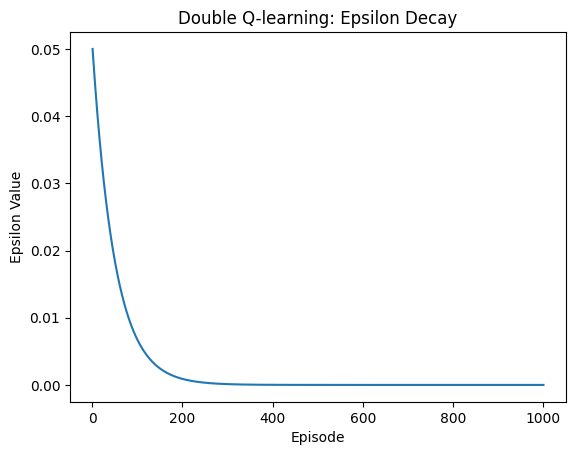

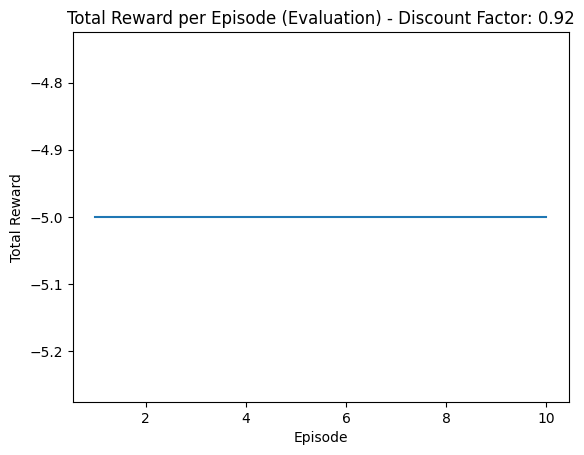

------------------------------------------------------
Now the discount factor is set to: 0.9
Initial Q1-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q2-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Agent fell in pit
Agent fell in pit
Episode 1/1000, Total Reward: -14
Episode 2/1000, Total Reward: 2
Episode 3/1000, Total Reward: 0
Episode 4/1000, Total Reward: 5
Episode 5/1000, Total Reward: -1
Episode 6/1000, Total Reward: 2
Agent fell in pit
Agent fell in pit
Episode 7/1000, Total Reward: -18
Episode 8/1000, Total Reward: 7
Episode 9/1000, Total Reward: 8
Agent fell in pit
Episo

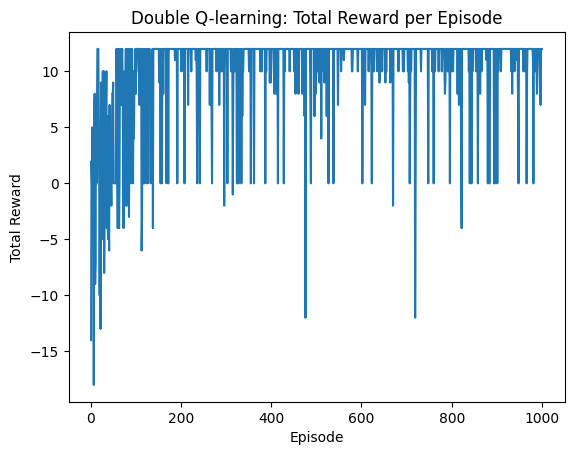

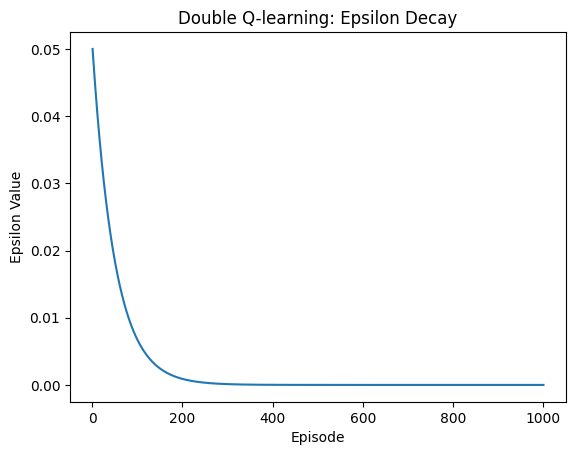

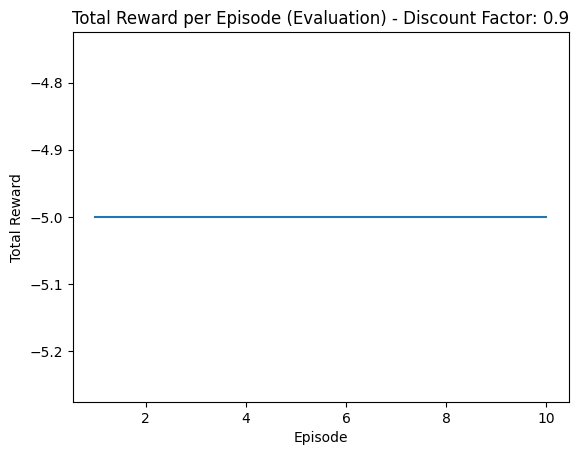

------------------------------------------------------
Now the discount factor is set to: 0.99
Initial Q1-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Initial Q2-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Agent fell in pit
Episode 1/1000, Total Reward: -10
Episode 2/1000, Total Reward: 2
Agent fell in pit
Agent fell in pit
Episode 3/1000, Total Reward: -20
Episode 4/1000, Total Reward: 6
Agent fell in pit
Episode 5/1000, Total Reward: -11
Episode 6/1000, Total Reward: 5
Episode 7/1000, Total Reward: 4
Episode 8/1000, Total Reward: 4
Episode 9/1000, Total Reward: 2
Agent fell in pit
Epi

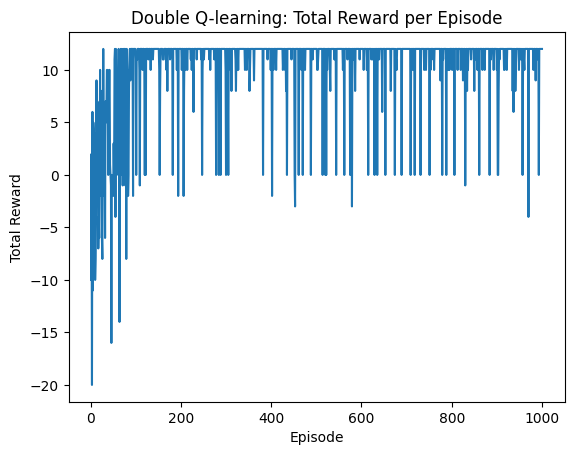

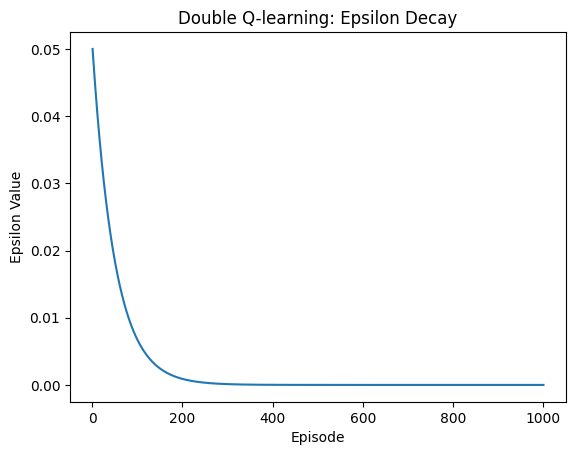

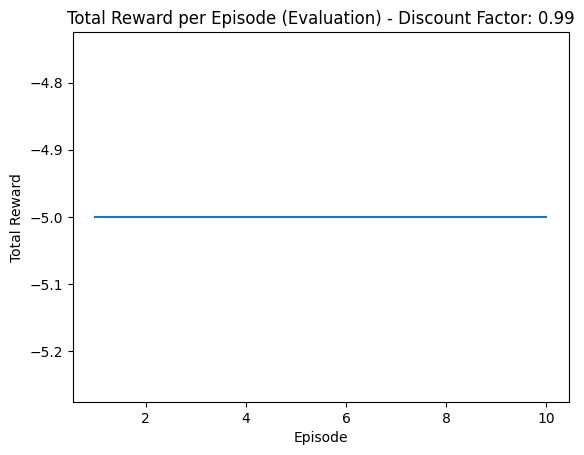

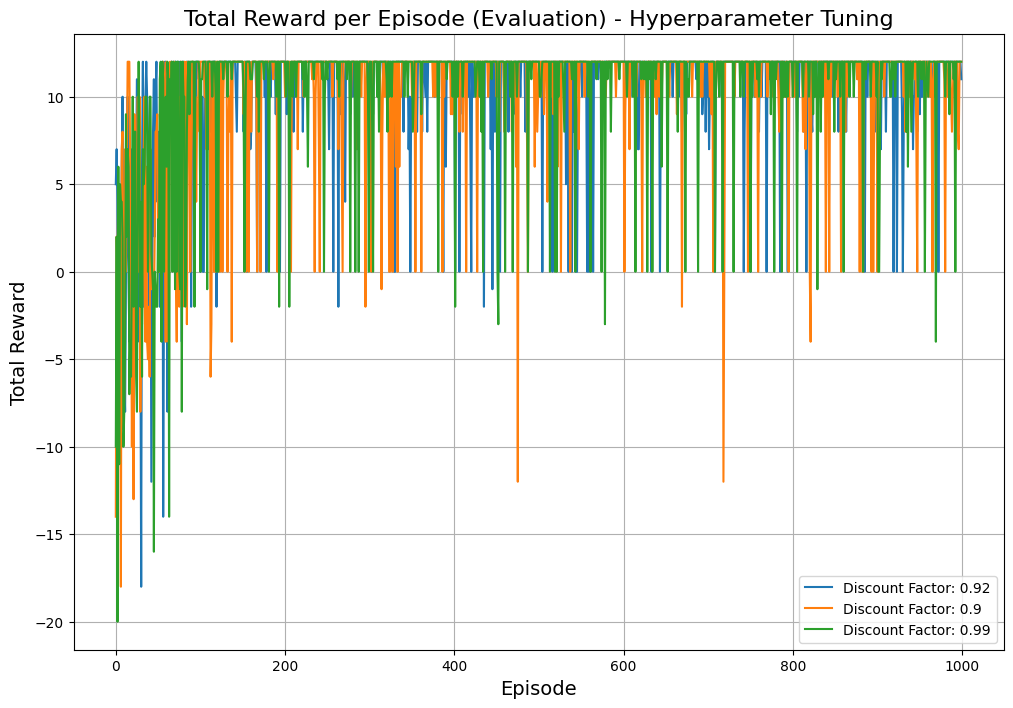

In [ ]:
def hyperparameter_tuning_discount_factor(env, discount_factors, episodes=1000):
    results = defaultdict(list)

    for discount_factor in discount_factors:
        print("------------------------------------------------------")
        print("Now the discount factor is set to:", discount_factor)

        agent = DoubleQLearningAgent(env, gamma=discount_factor)
        total_rewards = agent.train(num_episodes=episodes)

        print("\nTrained Q-table 1:")
        print(agent.Q1)

        print("\nTrained Q-table 2:")
        print(agent.Q2)


        plt.plot(range(1, num_episodes + 1), total_rewards)
        plt.xlabel('Episode')
        plt.ylabel('Total Reward')
        plt.title('Double Q-learning: Total Reward per Episode')
        plt.show()


        epsilon_values = [agent.epsilon * agent.epsilon_decay ** episode for episode in range(num_episodes)]
        plt.plot(range(1, num_episodes + 1), epsilon_values)
        plt.xlabel('Episode')
        plt.ylabel('Epsilon Value')
        plt.title('Double Q-learning: Epsilon Decay')
        plt.show()

        num_evaluation_episodes = 10
        total_rewards_eval = []

        for _ in range(num_evaluation_episodes):
            state = env.reset()
            total_reward = 0

            while True:
                action = np.argmax(agent.Q1[state, :] + agent.Q2[state, :])
                next_state, reward, done, _ = env.step(action)
                total_reward += reward

                if done:
                    break

            total_rewards_eval.append(total_reward)

        results['discount_factor'].append(discount_factor)
        results['total_rewards'].append(total_rewards)
        results['total_rewards_eval'].append(total_rewards_eval)

        # Plot evaluation results for each discount factor
        plt.plot(range(1, num_evaluation_episodes + 1), total_rewards_eval)
        plt.xlabel('Episode')
        plt.ylabel('Total Reward')
        plt.title(f'Total Reward per Episode (Evaluation) - Discount Factor: {discount_factor}')
        plt.show()

    return results


discount_factors = [0.92, 0.9, 0.99]

tuning_results_discount_factor = hyperparameter_tuning_discount_factor(env, discount_factors)


plt.figure(figsize=(12, 8))

for i, discount_factor in enumerate(discount_factors):
    label = f'Discount Factor: {discount_factor}'
    plt.plot(tuning_results_discount_factor['total_rewards'][i], label=label)

plt.xlabel('Episode', fontsize=14)
plt.ylabel('Total Reward', fontsize=14)
plt.title('Total Reward per Episode (Evaluation) - Hyperparameter Tuning', fontsize=16)
plt.legend()
plt.grid()
plt.show()


# Bonus Part

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Initial Q-table:
[[0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]
 [0. 0. 0. 0.]]
Episode 1/1000, Total Reward: 2
Episode 2/1000, Total Reward: 5
Agent fell in pit
Episode 3/1000, Total Reward: -6
Episode 4/1000, Total Reward: -1
Episode 5/1000, Total Reward: -1
Agent fell in pit
Episode 6/1000, Total Reward: -8
Episode 7/1000, Total Reward: 3
Episode 8/1000, Total Reward: -3
Agent fell in pit
Episode 9/1000, Total Reward: -8
Episode 10/1000, Total Reward: 2
Agent fell in pit
Episode 11/1000, Total Reward: -8
Agent fell in pit
Episode 12/1000, Total Reward: -6
Episode 13/1000, Total Reward: 8
Episode 14/1000, Total Reward: 2
Agent fell in pit
Episode 15/1000, Total Reward: -6
Episode 16/1000, Total Reward: 0
Agent fell in pit
Episode 17/1000, Total Reward: -1
Agent fell in pit
Episode 18/1000, Total Reward: -5
Ag

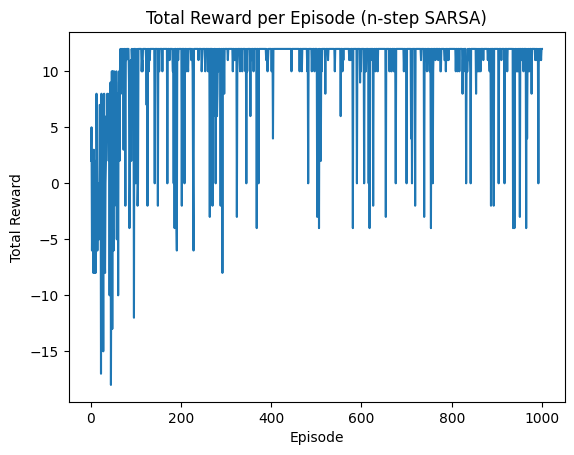

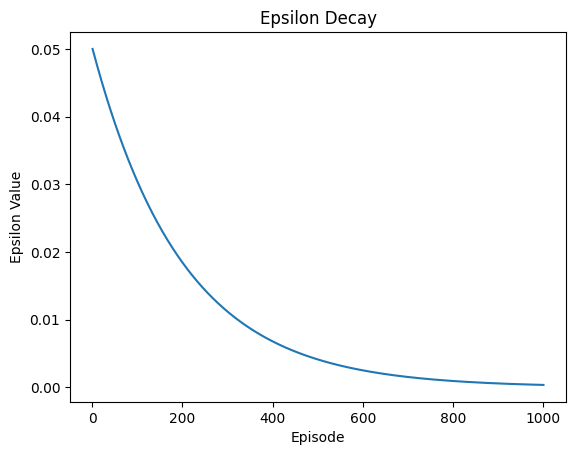

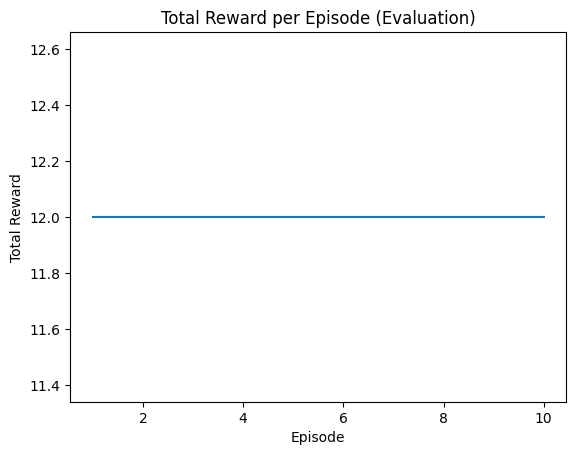

[12, 12, 12, 12, 12, 12, 12, 12, 12, 12]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

class NStepSARSA:
    def __init__(self, env, n, alpha=0.1, gamma=0.95, epsilon_start=1.0, epsilon_decay=0.98, epsilon_min=0.05):
        self.env = env
        self.alpha = alpha
        self.gamma = gamma
        self.epsilon = epsilon_start
        self.epsilon_decay = epsilon_decay
        self.epsilon_min = epsilon_min
        self.Q = np.zeros((env.state_space.n, env.action_space.n))
        self.n = n
        print("Initial Q-table:")
        print(self.Q)

    def choose_action(self, state):
        if np.random.rand() < self.epsilon:
            return int(np.random.choice(self.env.action_space.n))
        else:
            state_int = self.state_to_int(state)
            q_values = self.Q[state_int, :]
            max_actions = np.where(q_values == np.max(q_values))[0]
            return int(np.random.choice(max_actions))

    def state_to_int(self, state):
        x, y = state
        return x * self.env.grid_size + y

    def update_q_table(self, state, action, reward, next_state, next_action, n_step_returns):
        state = self.state_to_int(state)
        action = int(action)

        n_step_return = sum([self.gamma ** i * r for i, r in enumerate(n_step_returns)])
        current_value = self.Q[state, action]
        updated_value = current_value + self.alpha * (n_step_return - current_value)
        self.Q[state, action] = updated_value

    def train(self, num_episodes):
        total_rewards = []

        for episode in range(num_episodes):
            state = self.env.reset()
            action = self.choose_action(state)
            total_reward = 0
            n_step_returns = [0] * self.n

            for step in range(self.env.max_steps):
                next_state, reward, done, _ = self.env.step(action)
                next_action = self.choose_action(next_state)
                n_step_returns.pop(0)
                n_step_returns.append(reward)
                self.update_q_table(state, action, reward, next_state, next_action, n_step_returns)

                state = next_state
                action = next_action
                total_reward += reward

                if done:
                    break

            total_rewards.append(total_reward)

            self.epsilon = max(self.epsilon * self.epsilon_decay, self.epsilon_min)

            print(f"Episode {episode + 1}/{num_episodes}, Total Reward: {total_reward}")

        return total_rewards


env = LawnmowerGridWorld()
n_step_sarsa_agent = NStepSARSA(env, n=2)

num_episodes = 1000
total_rewards_n_step = n_step_sarsa_agent.train(num_episodes)
print("\nTrained Q-table:")
print(n_step_sarsa_agent.Q)

plt.plot(range(1, num_episodes + 1), total_rewards_n_step)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode (n-step SARSA)')
plt.show()
epsilon_values = [sarsa_agent.epsilon * sarsa_agent.epsilon_decay ** episode for episode in range(num_episodes)]
plt.plot(range(1, num_episodes + 1), epsilon_values)
plt.xlabel('Episode')
plt.ylabel('Epsilon Value')
plt.title('Epsilon Decay')
plt.show()


num_evaluation_episodes = 10
total_rewards_eval = []

for _ in range(num_evaluation_episodes):
    state = env.reset()
    total_reward = 0

    while True:
        action = np.argmax(sarsa_agent.Q[state, :])
        state, reward, done, _ = env.step(action)
        total_reward += reward
        # env.render()
        if done:
            break

    total_rewards_eval.append(total_reward)


plt.plot(range(1, num_evaluation_episodes + 1), total_rewards_eval)
plt.xlabel('Episode')
plt.ylabel('Total Reward')
plt.title('Total Reward per Episode (Evaluation)')
plt.show()
print(total_rewards_eval)